In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importações necessárias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
import json
import urllib.request

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score
from sklearn.cluster import DBSCAN, KMeans
from datetime import datetime, date

sns.set(rc={'figure.figsize':(11.7,8.27)})

 # Checkpoint 2

## Visão Geral dos Dados

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/dados_mineracao/mineracao.parquet')
df.head(3)

,jotform_id,#179,#298,#352,#406,#52,#5543,#5624,casa_familia_mora_e#5554,crianca_esta_vacina_em_dia#293,...,se_sim_quantos_trabalham#230,se_sim_quem#115,serie:#5509,Timer#2285,disponibilidade_alimento_pos_covid#223,cria_animais_consumo#224,gostaria_fazer_curso_qualificacao#5542,planta_alimentos_consumo#226,possui_deficiencia#100,zona
0,5105402612321529438,3,None,None,None,<table><tr><td><b>meses</b>: </td><td>6</td></...,1,None,Própria,None,...,None,None,Décima,Time taken to fill form: 00:12:43,"Sim, diminuiu",Sim,Não,Não,Não possui nenhuma deficiência,Urbana
1,5106352889422661952,5,None,None,None,<table><tr><td><b>meses</b>: </td><td>0</td></...,1,None,Emprestada/cedida,None,...,None,None,Nona,Time taken to fill form: 00:02:09,"Sim, diminuiu",Não,Sim,Sim,Não possui nenhuma deficiência,Urbana
2,5106534867026525710,5,None,None,None,<table><tr><td><b>meses</b>: </td><td>2</td></...,01,None,Própria,None,...,None,None,Décima,Time taken to fill form: 00:13:42,"Sim, aumentou",Não,Sim,Sim,Não possui nenhuma deficiência,Urbana


In [ ]:
print("Total de Linhas: ", df.shape[0])
print("Total de Colunas: ", df.shape[1])

Total de Linhas:  27101
Total de Colunas:  181


In [ ]:
df.describe()

,jotform_id,#179,#298,#352,#406,#52,#5543,#5624,casa_familia_mora_e#5554,crianca_esta_vacina_em_dia#293,...,se_sim_quantos_trabalham#230,se_sim_quem#115,serie:#5509,Timer#2285,disponibilidade_alimento_pos_covid#223,cria_animais_consumo#224,gostaria_fazer_curso_qualificacao#5542,planta_alimentos_consumo#226,possui_deficiencia#100,zona
count,27101,5730,8398,1395,160,26951,5731,2,27101,8398,...,4870,1272,26127,26776,27101,27101,27101,27101,27074,27101
unique,27101,24,2311,631,107,5224,9,1,4,5,...,32,30,12,2321,3,2,3,2,17,3
top,5105402612321529438,3,<table><tr><td><b>meses</b>: </td><td>6</td></...,<table><tr><td><b>meses</b>: </td><td>6</td></...,<table><tr><td><b>meses</b>: </td><td>6</td></...,<table><tr><td><b>meses</b>: </td><td>6</td></...,1,4,Própria,"Sim, visto na caderneta",...,1,Eu mesma,Não se aplica,Time taken to fill form: 00:01:51,"Sim, diminuiu",Não,Sim,Não,Não possui nenhuma deficiência,Rural
freq,1,1627,1073,161,15,3368,3667,2,15871,4144,...,4309,1076,6467,101,23144,17769,17488,16156,26495,15158


In [ ]:
sorted(list(df.columns.values.tolist()), reverse=True)

['zona',
 'ultimos_12meses_alguem_fez_curso_qualificacao#232',
 'total_ganho_pela_familia_mes_passado#231',
 'sua_data_nascimento#89',
 'serie_grau_crianca#5606',
 'serie_grau_crianca#5605',
 'serie_grau_crianca#5604',
 'serie_grau_crianca#5602',
 'serie:#5509',
 'se_sim_quem#115',
 'se_sim_quantos_trabalham#230',
 'se_sim_quais_participou#205',
 'se_sim_quais_participou#203',
 'se_sim_qtd_horas_crianca_fica_pre_escola#5590',
 'se_sim_qtd_horas_crianca_fica_pre_escola#5529',
 'se_sim_qtd_horas_crianca_fica_pre_escola#5523',
 'se_sim_qtd_horas_crianca_fica_pre_escola#5517',
 'se_sim_qtd_horas_crianca_fica_escola#5599',
 'se_sim_qtd_horas_crianca_fica_escola#5596',
 'se_sim_qtd_horas_crianca_fica_escola#5593',
 'se_sim_qtd_horas_crianca_fica_escola#5479',
 'se_sim_qtd_horas_crianca_fica_creche#5526',
 'se_sim_qtd_horas_crianca_fica_creche#5520',
 'se_sim_qtd_horas_crianca_fica_creche#5514',
 'se_sim_qtd_horas_crianca_fica_creche#5511',
 'se_sim_qtd_consultas_pre_natal_desde_engravidou#11

In [ ]:
df['iluminacao_utilizada_domicilio#194'].value_counts()

Elétrica                  26686
Outra                       231
Óleo, querosene ou gás      104
Vela                         80
Name: iluminacao_utilizada_domicilio#194, dtype: int64

## Início do Pré-processamento

### Excluindo colunas

In [ ]:
df.drop(['se_sim_quem#115','se_sim_quais_participou#205', 'se_sim_quais_participou#203', 'se_sim_qtd_consultas_pre_natal_desde_engravidou#119',
         'se_outra_pessoa_qual_idade#116','recebeu_suplementacao_acidofolico_sulfatoferroso#5531','outras_observacoes#5621', 'observacoes#5552',
         'ja_engravidou#5582', 'ja_engravidou#5538', 'idade_que_engravidou#5583','idade_que_engravidou#5539', 'formulario_aplicado_na_cada_da_familia#5612',
         'existe_outra_adoslecente_12_18_sex_fem#5576', 'existe_adoslecente_12_18_sex_fem#5534', 'dias_de_idade_adolescente2#5579',
        'dias_de_idade_adolescente1#5564', 'data_nascimento#5577', 'data_nascimento#5535', 'coordenadas_geograficas_automatico#5620', 'agente_aplicou_questionario#5546', 'Timer#2285',
        'Longitude#5614', 'Latitude#5613', '#5624', '#5543', '#52', '#406', '#352', '#298', '#179', 'sua_data_nascimento#89',
        'serie_grau_crianca#5606', 'serie_grau_crianca#5605', 'serie_grau_crianca#5604', 'serie_grau_crianca#5602', 'serie:#5509', 'se_sim_qtd_horas_crianca_fica_pre_escola#5590',
        'se_sim_qtd_horas_crianca_fica_pre_escola#5529', 'se_sim_qtd_horas_crianca_fica_pre_escola#5523', 'se_sim_qtd_horas_crianca_fica_pre_escola#5517',
        'se_sim_qtd_horas_crianca_fica_escola#5599',
        'se_sim_qtd_horas_crianca_fica_escola#5596', 'se_sim_qtd_horas_crianca_fica_escola#5593', 'se_sim_qtd_horas_crianca_fica_escola#5479',
        'se_sim_qtd_horas_crianca_fica_creche#5526', 'se_sim_qtd_horas_crianca_fica_creche#5520', 'se_sim_qtd_horas_crianca_fica_creche#5514', 'se_sim_qtd_horas_crianca_fica_creche#5511',
        'se_nao_quem_cuida_crianca_qnd_sai_para_trabalhar#5492', 'se_nao_quem_cuida_crianca_qnd_sai_para_trabalhar#5486', 'se_nao_quem_cuida_crianca_qnd_sai_para_trabalhar#5480',
        'se_nao_quem_cuida_crianca_qnd_sai_para_trabalhar#303',
        'quantos_meses_de_gravidez_agora#124', 'qts_vezes_lixo_passa_semana#5555', 'qtd_criancas_menor_que_oito#5625', 'programa_visitacao_domiciliar#2275',
        'programa_visitacao_domiciliar#2273', 'programa_visitacao_domiciliar#2264',
        'programa_visitacao_domiciliar#2262', 'possui_registro_nascimento#391', 'possui_registro_nascimento#337', 'possui_registro_nascimento#31',
        'possui_registro_nascimento#283', 'possui_cadernete_gestante#117',
        'planta_alimentos_consumo#226', 'pergunta_anterior_foi_respondida#5558', 'idade_crianca_parou_mamar_peito#50', 'idade_crianca_parou_mamar_peito#405', 'idade_crianca_parou_mamar_peito#351',
        'idade_crianca_parou_mamar_peito#297', 'idade_crianca4#2269', 'idade_crianca3#2266', 'idade_crianca2#5562', 'idade_crianca1#2258', 'gostaria_fazer_curso_qualificacao#5542',
        'genero_crianca#386', 'genero_crianca#332', 'genero_crianca#278', 'genero_crianca#26', 'genero#18', 'faz_acompanhamento_pre_natal#118', 'exames_realizados_gestacao#5530',
        'crianca_possui_caderneta#392', 'crianca_possui_caderneta#338', 'crianca_possui_caderneta#32', 'crianca_possui_caderneta#284', 'crianca_mamou_primeiras_horas_de_vida#49',
        'crianca_mamou_primeiras_horas_de_vida#404', 'crianca_mamou_primeiras_horas_de_vida#350', 'crianca_mamou_primeiras_horas_de_vida#296', 'crianca_esta_vacina_em_dia#46',
        'crianca_esta_vacina_em_dia#401', 'crianca_esta_vacina_em_dia#347', 'crianca_esta_vacina_em_dia#293', 'crianca_acompanhada_equipe_saude_familia#48',
        'crianca_acompanhada_equipe_saude_familia#403', 'crianca_acompanhada_equipe_saude_familia#349',
        'crianca_acompanhada_equipe_saude_familia#295', 'cria_animais_consumo#224', 'alguem_familia_e_de_comunidade#185', 'Grau:#5508'], axis=1, inplace=True)

In [ ]:
print("Total de Colunas: ", df.shape[1])

Total de Colunas:  79


In [ ]:
sorted(list(df.columns.values.tolist()), reverse=True)

['zona',
 'ultimos_12meses_alguem_fez_curso_qualificacao#232',
 'total_ganho_pela_familia_mes_passado#231',
 'se_sim_quantos_trabalham#230',
 'se_sim_crianca_matriculada_em#5598',
 'se_sim_crianca_matriculada_em#5595',
 'se_sim_crianca_matriculada_em#5592',
 'se_sim_crianca_matriculada_em#5589',
 'se_sim_crianca_matriculada_em#5528',
 'se_sim_crianca_matriculada_em#5525',
 'se_sim_crianca_matriculada_em#5522',
 'se_sim_crianca_matriculada_em#5519',
 'se_sim_crianca_matriculada_em#5516',
 'se_sim_crianca_matriculada_em#5513',
 'se_sim_crianca_matriculada_em#5510',
 'se_sim_crianca_matriculada_em#5499',
 'se_sim_como_feito_escoamento_banheiro#193',
 'se_nao_pais_tem_interesse_matricular_creche_pre_escola#5493',
 'se_nao_pais_tem_interesse_matricular_creche_pre_escola#5487',
 'se_nao_pais_tem_interesse_matricular_creche_pre_escola#5481',
 'se_nao_pais_tem_interesse_matricular_creche_pre_escola#304',
 'qtd_pessoas_moram_casa#5626',
 'pre_escola#5527',
 'pre_escola#5521',
 'pre_escola#5515'

### Adicionando coluna com código do ibge

In [ ]:
dicionario = urllib.request.urlopen('https://servicodados.ibge.gov.br/api/v1/localidades/estados/23/municipios').read().decode()

In [ ]:
ds = pd.DataFrame(json.loads(dicionario))

In [ ]:
ds = ds.astype({'nome': 'string'})
munic = pd.Series(ds.id.values, index = ds.nome).to_dict()

In [ ]:
df['municipio#10'] = df['municipio#10'].replace(['Ererê'],'Ereré')

In [ ]:
df["ibge"] = df["municipio#10"].apply(lambda x:munic[x])

In [ ]:
df.loc[:, ["municipio#10", "ibge"]]

,municipio#10,ibge
0,Itaiçaba,2306207
1,Nova Olinda,2309201
2,Senador Sá,2312809
3,Groaíras,2304905
4,Sobral,2312908
...,...,...
27096,Itarema,2306553
27097,Tururu,2313559
27098,Carnaubal,2303402
27099,Groaíras,2304905


In [ ]:
df.head(3)

,jotform_id,casa_familia_mora_e#5554,crianca_possui_deficiencia#292,crianca_possui_deficiencia#346,crianca_possui_deficiencia#400,crianca_possui_deficiencia#45,beneficios#5561,agua_utilizada_para_beber_e#191,total_ganho_pela_familia_mes_passado#231,creche#5478,...,motivo_crianca_nao_escola_creche#309,motivo_crianca_nao_escola_creche#5483,motivo_crianca_nao_escola_creche#5489,motivo_crianca_nao_escola_creche#5495,se_sim_como_feito_escoamento_banheiro#193,se_sim_quantos_trabalham#230,disponibilidade_alimento_pos_covid#223,possui_deficiencia#100,zona,ibge
0,5105402612321529438,Própria,None,None,None,Não possui nenhuma deficiência,Pagamento do Cartão Mais Infância; Vale gás,Filtrada,300,Não frequenta creche,...,None,None,None,None,Fossa séptica,None,"Sim, diminuiu",Não possui nenhuma deficiência,Urbana,2306207
1,5106352889422661952,Emprestada/cedida,None,None,None,Não possui nenhuma deficiência,Pagamento do Cartão Mais Infância; Cesta básica,Filtrada,800,"Sim, gratuita",...,None,None,None,None,Rede coletora de esgoto ou pluvial,None,"Sim, diminuiu",Não possui nenhuma deficiência,Urbana,2309201
2,5106534867026525710,Própria,None,None,None,Mental ou intelectual,Pagamento do Cartão Mais Infância; Vale gás; I...,Filtrada,546,"Sim, gratuita",...,None,None,None,None,Rede coletora de esgoto ou pluvial,None,"Sim, aumentou",Não possui nenhuma deficiência,Urbana,2312809


In [ ]:
print("Total de Linhas: ", df.shape[0])
print("Total de Colunas: ", df.shape[1])

Total de Linhas:  27101
Total de Colunas:  80


### Dados de precipitação - *FUNCEME* / Adicionando coluna com precipitação média anual dos últimos 7 anos

In [ ]:
#Dataframe onde os dados serão agregados
df_precipitacao = pd.DataFrame(columns=['Anos', 'Total', 'Latitude', 'Longitude', 'Municipios'])

In [ ]:
#Agregando os dados
for i in range(1, 888): #Os arquivos são nomeados com números inteiros, o primeiro sendo 1 e o último sendo 887
    try:
        data = pd.read_csv(f"/content/drive/MyDrive/dados_mineracao/postos/{i}.txt", sep = ";")
        df1 = pd.DataFrame(data.groupby(['Anos'], as_index=False).agg({'Total':'sum',
                                                                      'Latitude':'first',
                                                                      'Longitude':'first',
                                                                      'Municipios':'first'})) #No momento apenas os dados anuais são agregados
        df_precipitacao = pd.concat([df_precipitacao, df1])
    except Exception as e: #Alguns numeros no intervalo (1, 888) não correspondem a arquivos
        pass

In [ ]:
#Adequando o tipo dos dados
df_precipitacao = df_precipitacao.astype({'Anos':'int32', 'Total': 'float32', 'Latitude':'float32', 'Longitude':'float32', 'Municipios':'str'})

In [ ]:
df_precipitacao.head()

,Anos,Total,Latitude,Longitude,Municipios
0,1981,513.299988,-7.361972,-39.047722,Abaiara
1,1982,506.200012,-7.361972,-39.047722,Abaiara
2,1983,827.599976,-7.361972,-39.047722,Abaiara
3,1984,794.200012,-7.361972,-39.047722,Abaiara
4,1985,1719.000000,-7.361972,-39.047722,Abaiara


In [ ]:
#Apenas os últimos 7 anos
df_precipitacao = df_precipitacao.query("Anos >= 2015")

In [ ]:
df_seca = df_precipitacao.groupby('Municipios').mean()[['Total']].reset_index()

In [ ]:
df_seca['Municipios'] = df_seca['Municipios'].replace(['Ererê'],'Ereré')
df_seca["ibge"] = df_seca["Municipios"].apply(lambda x:munic[x])

In [ ]:
#Os limites das latitudes/longitudes
lat_min = -7.8275
lat_max = -2.7931110858917236
long_min = -41.325833333333
long_max = -37.268388888889

In [ ]:
df_seca.drop(['Municipios'], axis=1, inplace=True)

In [ ]:
df_seca

,Total,ibge
0,999.375000,2300101
1,1028.599976,2300150
2,1132.370850,2300200
3,509.654755,2300309
4,476.509766,2300408
...,...,...
179,949.435730,2313807
180,977.027283,2313906
181,578.581238,2313955
182,871.581421,2314102


In [ ]:
df_seca['ibge'] = df_seca['ibge'].astype("int64")

In [ ]:
df_seca.dtypes

Total    float32
ibge       int64
dtype: object

In [ ]:
df['ibge'] = df['ibge'].astype("int64")

In [ ]:
df = df.merge(df_seca, on='ibge', how='inner')

In [ ]:
df = df.rename(columns={'Total' : 'precipitacao_media_nos_ultimos_sete_anos'})

In [ ]:
df.head(3)

,jotform_id,casa_familia_mora_e#5554,crianca_possui_deficiencia#292,crianca_possui_deficiencia#346,crianca_possui_deficiencia#400,crianca_possui_deficiencia#45,beneficios#5561,agua_utilizada_para_beber_e#191,total_ganho_pela_familia_mes_passado#231,creche#5478,...,motivo_crianca_nao_escola_creche#5483,motivo_crianca_nao_escola_creche#5489,motivo_crianca_nao_escola_creche#5495,se_sim_como_feito_escoamento_banheiro#193,se_sim_quantos_trabalham#230,disponibilidade_alimento_pos_covid#223,possui_deficiencia#100,zona,ibge,precipitacao_media_nos_ultimos_sete_anos
0,5105402612321529438,Própria,None,None,None,Não possui nenhuma deficiência,Pagamento do Cartão Mais Infância; Vale gás,Filtrada,300,Não frequenta creche,...,None,None,None,Fossa séptica,None,"Sim, diminuiu",Não possui nenhuma deficiência,Urbana,2306207,695.862488
1,5117490894374472691,Própria,Não possui nenhuma deficiência,None,None,Não possui nenhuma deficiência,Pagamento do Cartão Mais Infância; Vale gás; C...,Filtrada,350,Não frequenta creche,...,Outro motivo,None,None,Fossa séptica,None,"Sim, diminuiu",Não possui nenhuma deficiência,Rural,2306207,695.862488
2,5112331884371457888,Própria,None,None,None,Não possui nenhuma deficiência,Pagamento do Cartão Mais Infância; Vale gás,Filtrada,400,"Sim, gratuita",...,None,None,None,Fossa séptica,None,"Sim, diminuiu",Não possui nenhuma deficiência,Rural,2306207,695.862488


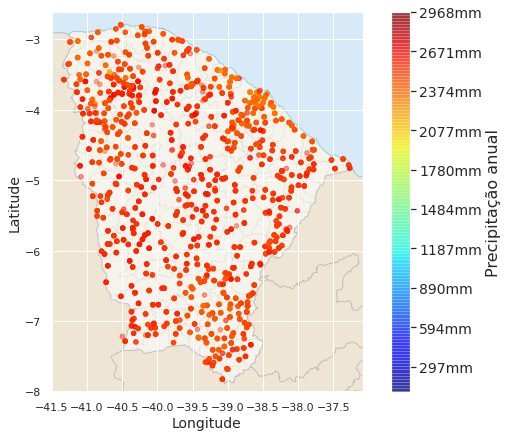

In [ ]:
c = 0.185
ceara_img = mpimg.imread('/content/drive/MyDrive/dados_mineracao/ceara.png')
df_precipitacao.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4,
          c='Total', figsize=(10,7), cmap=plt.get_cmap("autumn"),
           colorbar=False, sharex=False)
plt.imshow(ceara_img, extent=[long_min-c, long_max+c, lat_min-c, lat_max+c], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

totals = df_precipitacao['Total']
tick_values = np.linspace(totals.min(), totals.max(), 11)
cbar = plt.colorbar(ticks=tick_values/totals.max())
cbar.ax.set_yticklabels(["%dmm"%(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('Precipitação anual', fontsize=16)

### Início do cálculo de Insegurança Alimentar / Adicionando coluna com classificação da Insegurança Alimentar

##### Sim, quase todo dia → IA GRAVE
##### Sim, alguns dias → IA MODERADA
##### Sim, mas só 1 ou 2 dias → IA LEVE
##### Não → Fora de insegurança alimentar

##### É baseado na EBIA (Escala Brasileira de Insegurança Alimentar)

In [ ]:
df_ia = df[["jotform_id",
    "nos_ultimos_3meses_comida_acabou_antes_de_comprar_mais#220",
    "nos_ultimos_3meses_teve_medo_que_comida_acabasse_antes_de_comprar_mais#219",
    "nos_ultimos_3meses_alguem_comeu_menos_que_devia_pq_nao_havia_dinheiro#5560",
    "nos_ultimos_3meses_faltou_dinheiro_para_alimentacao_saudavel#221",
    "nos_ultimos_3meses_algum_adulto_diminuiu_refeicao_pq_nao_havia_dinheiro#222"]]
df_ia.head()

,jotform_id,nos_ultimos_3meses_comida_acabou_antes_de_comprar_mais#220,nos_ultimos_3meses_teve_medo_que_comida_acabasse_antes_de_comprar_mais#219,nos_ultimos_3meses_alguem_comeu_menos_que_devia_pq_nao_havia_dinheiro#5560,nos_ultimos_3meses_faltou_dinheiro_para_alimentacao_saudavel#221,nos_ultimos_3meses_algum_adulto_diminuiu_refeicao_pq_nao_havia_dinheiro#222
0,5105402612321529438,"Sim, alguns dias","Sim, alguns dias","Sim, alguns dias","Sim, alguns dias",Não
1,5117490894374472691,"Sim, quase todo dia","Sim, quase todo dia",Não,"Sim, quase todo dia",Não
2,5112331884371457888,"Sim, quase todo dia","Sim, quase todo dia",Não,"Sim, quase todo dia",Não
3,5110751002329439619,Não,Não,Não,Não,Não
4,5207337832326078081,Não,Não,Não,Não,Não


In [ ]:
df_ia.rename(columns=lambda x: x.split('#')[0], inplace=True)

In [ ]:
df_ia.head()

,jotform_id,nos_ultimos_3meses_comida_acabou_antes_de_comprar_mais,nos_ultimos_3meses_teve_medo_que_comida_acabasse_antes_de_comprar_mais,nos_ultimos_3meses_alguem_comeu_menos_que_devia_pq_nao_havia_dinheiro,nos_ultimos_3meses_faltou_dinheiro_para_alimentacao_saudavel,nos_ultimos_3meses_algum_adulto_diminuiu_refeicao_pq_nao_havia_dinheiro
0,5105402612321529438,"Sim, alguns dias","Sim, alguns dias","Sim, alguns dias","Sim, alguns dias",Não
1,5117490894374472691,"Sim, quase todo dia","Sim, quase todo dia",Não,"Sim, quase todo dia",Não
2,5112331884371457888,"Sim, quase todo dia","Sim, quase todo dia",Não,"Sim, quase todo dia",Não
3,5110751002329439619,Não,Não,Não,Não,Não
4,5207337832326078081,Não,Não,Não,Não,Não


In [ ]:
ia_grave, ia_moderado, ia_leve, fora_ia = "Sim, quase todo dia", "Sim, alguns dias", "Sim, mas só 1 ou 2 dias", "Não"

In [ ]:
# IA Grave
condicao_grave = df_ia.apply(lambda row: ia_grave in row.to_list(), axis=1)

In [ ]:
print("Número de familías em condição grave de Insegurança Alimentar: ", df_ia[condicao_grave].shape[0])
#df_ia[condicao_grave].shape

Número de familías em condição grave de Insegurança Alimentar:  8814


In [ ]:
# IA Moderada
condicao_moderada = df_ia.apply(lambda row: ia_moderado in row.to_list() and ia_grave not in row.to_list(), axis=1)

In [ ]:
print("Número de familías em condição moderada de Insegurança Alimentar: ", df_ia[condicao_moderada].shape[0])
#df_ia[condicao_moderada].shape

Número de familías em condição moderada de Insegurança Alimentar:  14371


In [ ]:
# IA Leve
condicao_leve = df_ia.apply(lambda row: ia_leve in row.to_list() \
                        and ia_grave not in row.to_list() \
                        and ia_moderado not in row.to_list(),axis=1
)

In [ ]:
print("Número de familías em condição leve de Insegurança Alimentar: ", df_ia[condicao_leve].shape[0])
#df_ia[condicao_leve].shape

Número de familías em condição leve de Insegurança Alimentar:  1677


In [ ]:
# Fora de IA
sem_ia = df_ia.apply(lambda row: fora_ia in row.to_list() \
                    and ia_grave not in row.to_list() \
                    and ia_moderado not in row.to_list() \
                    and ia_leve not in row.to_list(), axis=1)

In [ ]:
print("Número de familías fora de Insegurança Alimentar: ", df_ia[sem_ia].shape[0])
#df_ia[sem_ia].shape

Número de familías fora de Insegurança Alimentar:  2239


In [ ]:
df_ia.loc[condicao_grave, 'classificacao'] = 'Insegurança alimentar grave'
df_ia.loc[condicao_moderada, 'classificacao'] = 'Insegurança alimentar moderada'
df_ia.loc[condicao_leve, 'classificacao'] = 'Insegurança alimentar leve'
df_ia.loc[sem_ia, 'classificacao'] = 'Fora de insegurança alimentar'

In [ ]:
df_ia.head()

,jotform_id,nos_ultimos_3meses_comida_acabou_antes_de_comprar_mais,nos_ultimos_3meses_teve_medo_que_comida_acabasse_antes_de_comprar_mais,nos_ultimos_3meses_alguem_comeu_menos_que_devia_pq_nao_havia_dinheiro,nos_ultimos_3meses_faltou_dinheiro_para_alimentacao_saudavel,nos_ultimos_3meses_algum_adulto_diminuiu_refeicao_pq_nao_havia_dinheiro,classificacao
0,5105402612321529438,"Sim, alguns dias","Sim, alguns dias","Sim, alguns dias","Sim, alguns dias",Não,Insegurança alimentar moderada
1,5117490894374472691,"Sim, quase todo dia","Sim, quase todo dia",Não,"Sim, quase todo dia",Não,Insegurança alimentar grave
2,5112331884371457888,"Sim, quase todo dia","Sim, quase todo dia",Não,"Sim, quase todo dia",Não,Insegurança alimentar grave
3,5110751002329439619,Não,Não,Não,Não,Não,Fora de insegurança alimentar
4,5207337832326078081,Não,Não,Não,Não,Não,Fora de insegurança alimentar


In [ ]:
df = df.join(df_ia["classificacao"])
df.head(3)

,jotform_id,casa_familia_mora_e#5554,crianca_possui_deficiencia#292,crianca_possui_deficiencia#346,crianca_possui_deficiencia#400,crianca_possui_deficiencia#45,beneficios#5561,agua_utilizada_para_beber_e#191,total_ganho_pela_familia_mes_passado#231,creche#5478,...,motivo_crianca_nao_escola_creche#5489,motivo_crianca_nao_escola_creche#5495,se_sim_como_feito_escoamento_banheiro#193,se_sim_quantos_trabalham#230,disponibilidade_alimento_pos_covid#223,possui_deficiencia#100,zona,ibge,precipitacao_media_nos_ultimos_sete_anos,classificacao
0,5105402612321529438,Própria,None,None,None,Não possui nenhuma deficiência,Pagamento do Cartão Mais Infância; Vale gás,Filtrada,300,Não frequenta creche,...,None,None,Fossa séptica,None,"Sim, diminuiu",Não possui nenhuma deficiência,Urbana,2306207,695.862488,Insegurança alimentar moderada
1,5117490894374472691,Própria,Não possui nenhuma deficiência,None,None,Não possui nenhuma deficiência,Pagamento do Cartão Mais Infância; Vale gás; C...,Filtrada,350,Não frequenta creche,...,None,None,Fossa séptica,None,"Sim, diminuiu",Não possui nenhuma deficiência,Rural,2306207,695.862488,Insegurança alimentar grave
2,5112331884371457888,Própria,None,None,None,Não possui nenhuma deficiência,Pagamento do Cartão Mais Infância; Vale gás,Filtrada,400,"Sim, gratuita",...,None,None,Fossa séptica,None,"Sim, diminuiu",Não possui nenhuma deficiência,Rural,2306207,695.862488,Insegurança alimentar grave


In [ ]:
df_ia.shape

(27101, 7)

### Separando features relacionadas aos benefícios, CRAS, CREAS e trabalho

In [ ]:
df_renda = df[['jotform_id', 'zona','ultimos_12meses_alguem_fez_curso_qualificacao#232','total_ganho_pela_familia_mes_passado#231','se_sim_quantos_trabalham#230','possui_internet#5540','municipio#10','fontes_renda_familia#5557','creas#206','cras#201','beneficios#5561','alguem_familia_tem_trab_remunerado#229']]
df_renda.shape

(27101, 12)

In [ ]:
# Removendo os "#id_da_coluna" depois dos nomes das colunas
df_renda = df_renda.rename(columns={'ultimos_12meses_alguem_fez_curso_qualificacao#232' : 'ultimos_12meses_alguem_fez_curso_qualificacao'})
df_renda = df_renda.rename(columns={'possui_internet#5540' : 'possui_internet'})
df_renda = df_renda.rename(columns={'municipio#10' : 'municipio'})
df_renda = df_renda.rename(columns={'fontes_renda_familia#5557' : 'fontes_renda_familia'})
df_renda = df_renda.rename(columns={'creas#206' : 'creas'})
df_renda = df_renda.rename(columns={'cras#201' : 'cras'})
df_renda = df_renda.rename(columns={'beneficios#5561' : 'beneficios'})
df_renda = df_renda.rename(columns={'total_ganho_pela_familia_mes_passado#231' : 'total_ganho_pela_familia_mes_passado'})
df_renda = df_renda.rename(columns={'se_sim_quantos_trabalham#230' : 'se_sim_quantos_trabalham'})
df_renda = df_renda.rename(columns={'alguem_familia_tem_trab_remunerado#229' : 'alguem_familia_tem_trab_remunerado'})


In [ ]:
df_renda.head(3)

,jotform_id,zona,ultimos_12meses_alguem_fez_curso_qualificacao,total_ganho_pela_familia_mes_passado,se_sim_quantos_trabalham,possui_internet,municipio,fontes_renda_familia,creas,cras,beneficios,alguem_familia_tem_trab_remunerado
0,5105402612321529438,Urbana,Não,300,None,Sim,Itaiçaba,Bolsa família / Cartão Mais Infância,O município não possui CREAS,Não,Pagamento do Cartão Mais Infância; Vale gás,Não
1,5117490894374472691,Rural,Não,350,None,Sim,Itaiçaba,Bolsa família / Cartão Mais Infância,O município não possui CREAS,Sim,Pagamento do Cartão Mais Infância; Vale gás; C...,Não
2,5112331884371457888,Rural,Não,400,None,Não,Itaiçaba,Bolsa família / Cartão Mais Infância,O município não possui CREAS,Sim,Pagamento do Cartão Mais Infância; Vale gás,Não


In [ ]:
# Excluindo coluna 'se_sim_quantos_trabalham' pois mais de 82% das respostas dela são nulas
df_renda.drop("se_sim_quantos_trabalham", axis = 1, inplace=True)

In [ ]:
# Transformando tipo da coluna em float
df_renda['total_ganho_pela_familia_mes_passado'] = df_renda['total_ganho_pela_familia_mes_passado'].astype(float)
df_renda['total_ganho_pela_familia_mes_passado'].dtype

dtype('float64')

In [ ]:
df_renda.drop(df_renda[df_renda.total_ganho_pela_familia_mes_passado > 2000].index, inplace=True)
df_renda.shape

(27026, 11)

Rural     15129
Urbana    11790
null        107
Name: zona, dtype: int64

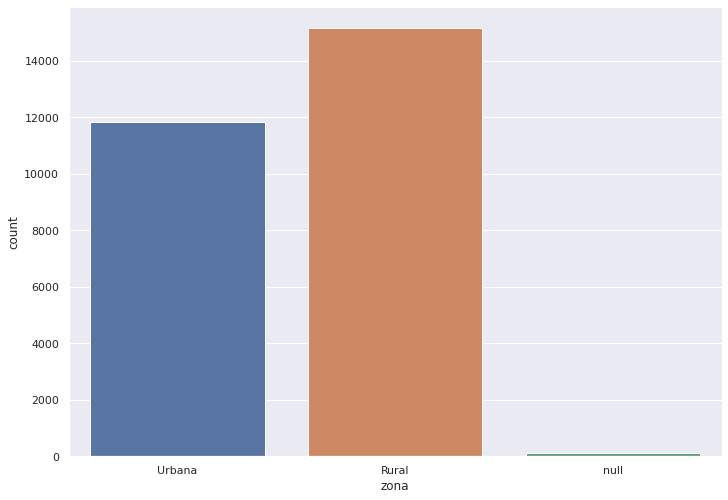

In [ ]:
# Distribuição da coluna zona
sns.countplot(df["zona"]);
prt = df_renda['zona'].value_counts();
prt

In [ ]:
# # Distribuição da coluna
# sns.countplot(df_renda['ultimos_12meses_alguem_fez_curso_qualificacao']);
# prt = df_renda['ultimos_12meses_alguem_fez_curso_qualificacao'].value_counts();
# prt

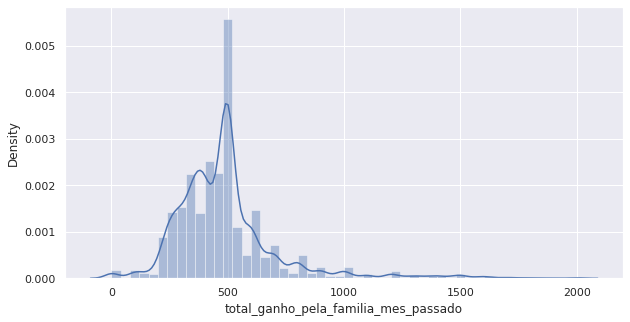

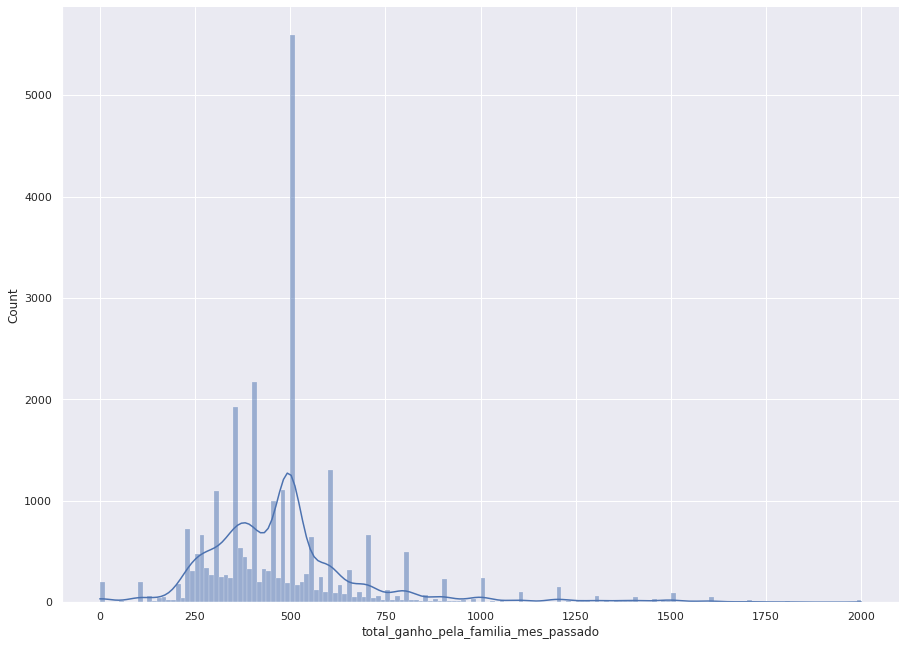

In [ ]:
# Distribuição da coluna
plt.figure(figsize=(10, 5))
ax = sns.distplot(df_renda['total_ganho_pela_familia_mes_passado'])
ax = sns.displot(data=df_renda, x="total_ganho_pela_familia_mes_passado", kde=True);
ax.figure.set_size_inches(15, 10)

In [ ]:
# # Distribuição da coluna
# sns.countplot(df_renda['possui_internet']);
# prt = df_renda['possui_internet'].value_counts();
# prt

In [ ]:
# Distribuição da coluna
prt = df_renda['municipio'].value_counts();
prt

Acaraú          398
Madalena        394
Missão Velha    368
Parambu         327
Araripe         320
               ... 
Beberibe          7
Mombaça           5
Morada Nova       2
Abaiara           2
Tarrafas          1
Name: municipio, Length: 176, dtype: int64

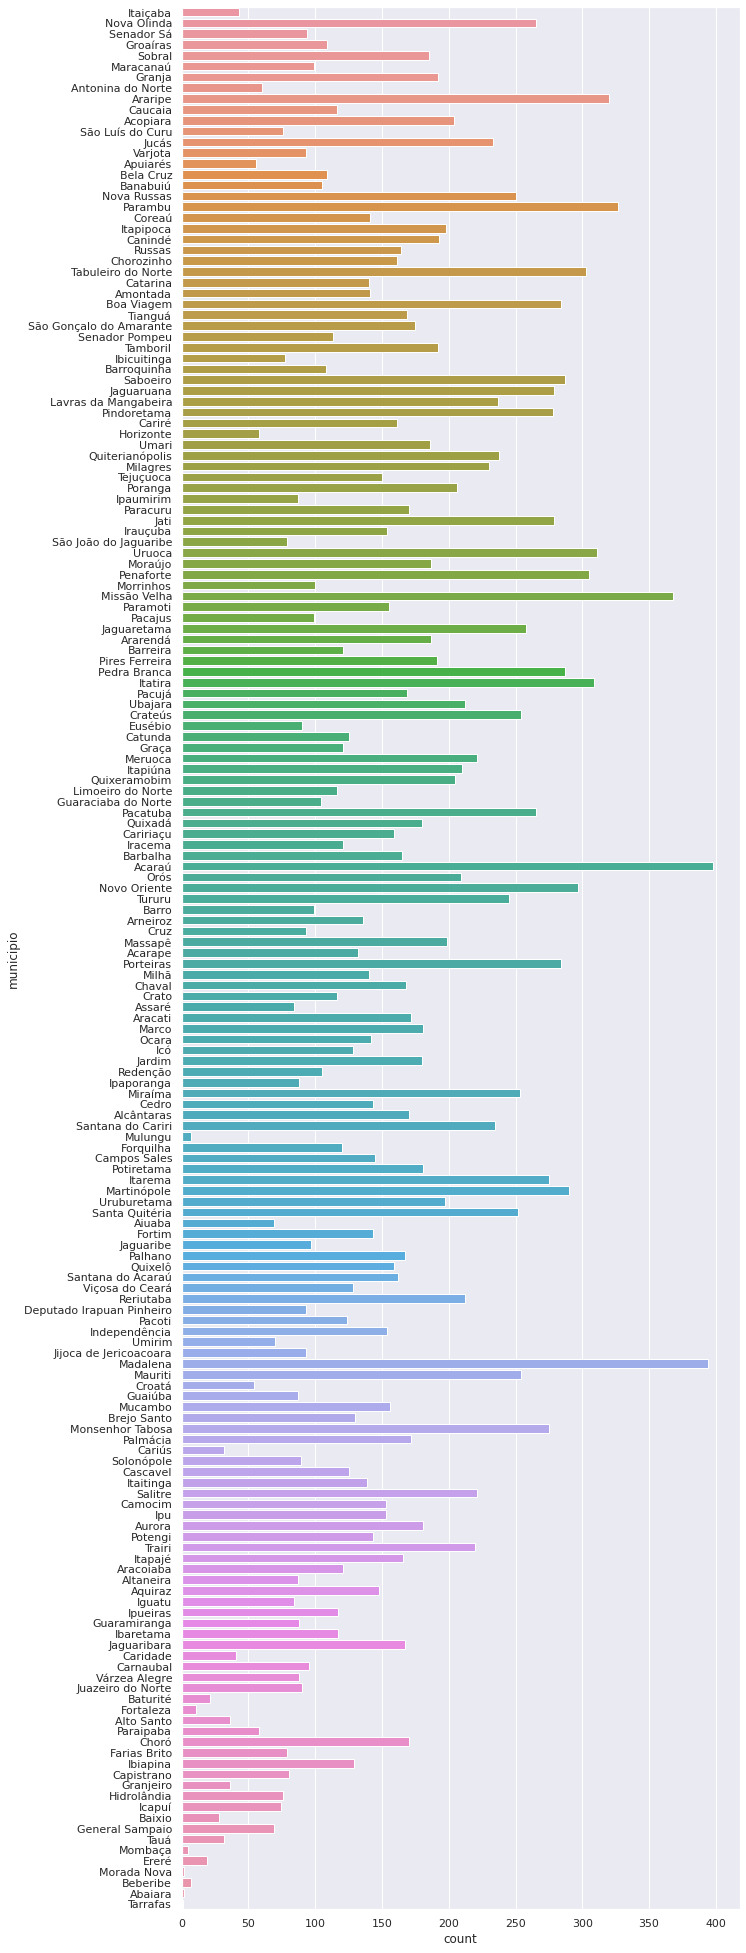

In [ ]:
ax = sns.countplot(y=df_renda['municipio']);
ax.figure.set_size_inches(10, 35)

In [ ]:
# # Distribuição da coluna
# ax = sns.countplot(df_renda['alguem_familia_tem_trab_remunerado']);
# ax.figure.set_size_inches(10, 5)

# prt = df_renda['alguem_familia_tem_trab_remunerado'].value_counts();
# prt


In [ ]:
# # Distribuição da coluna
# ax = sns.countplot(df_renda['creas']);
# ax.figure.set_size_inches(10, 5)

In [ ]:
# # Distribuição da coluna
# ax = sns.countplot(df_renda['cras']);
# ax.figure.set_size_inches(10, 5)

### Separando features relacionadas à Condição de moradia

In [ ]:
df_cm = df[["jotform_id",
    'iluminacao_utilizada_domicilio#194',
    'existem_lugares_para_crianca_brincar_proxima_casa#196',
    'existem_locais_para_atividades_esportivas_proxima_casa#198',
    'existem_atividades_culturais_para_jovens_proximo_casa#197',
    'existe_banheiro#192',
    'domicilio_possui_agua_canalizada_pelomenos_umcomodo#190',
    'domicilio_localizado_area_violencia#5541',
     'como_vc_cozinha_no_domicilio#195',
     'casa_familia_mora_e#5554', 'abastecimento_deagua_utilizado_domicilio#189',
    'agua_utilizada_para_beber_e#191',
    'disponibilidade_alimento_pos_covid#223',
    'material_predominante_parede_externa_casa#188',
    'agua_utilizada_para_beber_e#191',
    'se_sim_como_feito_escoamento_banheiro#193',]]

df_cm.head(3)

,jotform_id,iluminacao_utilizada_domicilio#194,existem_lugares_para_crianca_brincar_proxima_casa#196,existem_locais_para_atividades_esportivas_proxima_casa#198,existem_atividades_culturais_para_jovens_proximo_casa#197,existe_banheiro#192,domicilio_possui_agua_canalizada_pelomenos_umcomodo#190,domicilio_localizado_area_violencia#5541,como_vc_cozinha_no_domicilio#195,casa_familia_mora_e#5554,abastecimento_deagua_utilizado_domicilio#189,agua_utilizada_para_beber_e#191,disponibilidade_alimento_pos_covid#223,material_predominante_parede_externa_casa#188,agua_utilizada_para_beber_e#191,se_sim_como_feito_escoamento_banheiro#193
0,5105402612321529438,Elétrica,Sim,Sim,Sim,Sim,Sim,Não,Gás de botijão,Própria,Poço ou nascente,Filtrada,"Sim, diminuiu",Alvenaria com revestimento,Filtrada,Fossa séptica
1,5117490894374472691,Elétrica,Não,Não,Não,Sim,Não,Não,Lenha,Própria,Cisterna,Filtrada,"Sim, diminuiu",Taipa não revestida,Filtrada,Fossa séptica
2,5112331884371457888,Elétrica,Não,Não,Não,Sim,Não,Não,Lenha,Própria,Cisterna,Filtrada,"Sim, diminuiu",Alvenaria com revestimento,Filtrada,Fossa séptica


In [ ]:
print(df_cm['casa_familia_mora_e#5554'].value_counts())

Própria               15871
Emprestada/cedida      6685
Alugada                4544
Emprestada/ cedida        1
Name: casa_familia_mora_e#5554, dtype: int64


In [ ]:
df_cm.where(df_cm["casa_familia_mora_e#5554"] != "Emprestada/ cedida", "Emprestada/cedida", inplace=True)

In [ ]:
print(df_cm['iluminacao_utilizada_domicilio#194'].value_counts())
print('----------------------------------')
print(df_cm['existem_lugares_para_crianca_brincar_proxima_casa#196'].value_counts())
print('----------------------------------')
print(df_cm['existem_locais_para_atividades_esportivas_proxima_casa#198'].value_counts())
print('----------------------------------')
print(df_cm['existem_atividades_culturais_para_jovens_proximo_casa#197'].value_counts())
print('----------------------------------')
print(df_cm['existe_banheiro#192'].value_counts())
print('----------------------------------')
print(df_cm['domicilio_possui_agua_canalizada_pelomenos_umcomodo#190'].value_counts())
print('----------------------------------')
print(df_cm['domicilio_localizado_area_violencia#5541'].value_counts())
print('----------------------------------')
print(df_cm['como_vc_cozinha_no_domicilio#195'].value_counts())
print('----------------------------------')
print(df_cm['casa_familia_mora_e#5554'].value_counts())

Elétrica                  26685
Outra                       231
Óleo, querosene ou gás      104
Vela                         80
Emprestada/cedida             1
Name: iluminacao_utilizada_domicilio#194, dtype: int64
----------------------------------
Não                  20737
Sim                   6172
Não sei                191
Emprestada/cedida        1
Name: existem_lugares_para_crianca_brincar_proxima_casa#196, dtype: int64
----------------------------------
Não                  20876
Sim                   5962
Não sei                262
Emprestada/cedida        1
Name: existem_locais_para_atividades_esportivas_proxima_casa#198, dtype: int64
----------------------------------
Não                  25977
Sim                    898
Não sei                225
Emprestada/cedida        1
Name: existem_atividades_culturais_para_jovens_proximo_casa#197, dtype: int64
----------------------------------
Sim                  23071
Não                   4029
Emprestada/cedida        1
Name: exi

In [ ]:
df_cm.rename(columns=lambda x: x.split('#')[0], inplace=True)

In [ ]:
df_cm.head()

,jotform_id,iluminacao_utilizada_domicilio,existem_lugares_para_crianca_brincar_proxima_casa,existem_locais_para_atividades_esportivas_proxima_casa,existem_atividades_culturais_para_jovens_proximo_casa,existe_banheiro,domicilio_possui_agua_canalizada_pelomenos_umcomodo,domicilio_localizado_area_violencia,como_vc_cozinha_no_domicilio,casa_familia_mora_e,abastecimento_deagua_utilizado_domicilio,agua_utilizada_para_beber_e,disponibilidade_alimento_pos_covid,material_predominante_parede_externa_casa,agua_utilizada_para_beber_e,se_sim_como_feito_escoamento_banheiro
0,5105402612321529438,Elétrica,Sim,Sim,Sim,Sim,Sim,Não,Gás de botijão,Própria,Poço ou nascente,Filtrada,"Sim, diminuiu",Alvenaria com revestimento,Filtrada,Fossa séptica
1,5117490894374472691,Elétrica,Não,Não,Não,Sim,Não,Não,Lenha,Própria,Cisterna,Filtrada,"Sim, diminuiu",Taipa não revestida,Filtrada,Fossa séptica
2,5112331884371457888,Elétrica,Não,Não,Não,Sim,Não,Não,Lenha,Própria,Cisterna,Filtrada,"Sim, diminuiu",Alvenaria com revestimento,Filtrada,Fossa séptica
3,5110751002329439619,Elétrica,Sim,Sim,Não,Sim,Sim,Não,Gás de botijão,Própria,Rede geral de distribuição,Água mineral,Não mudou,Alvenaria com revestimento,Água mineral,Fossa séptica
4,5207337832326078081,Elétrica,Não,Não,Não,Não,Não,Não,Gás de botijão,Própria,Cisterna,Água mineral,Não mudou,Alvenaria sem revestimento,Água mineral,None


Elétrica                  26685
Outra                       231
Óleo, querosene ou gás      104
Vela                         80
Emprestada/cedida             1
Name: iluminacao_utilizada_domicilio, dtype: int64

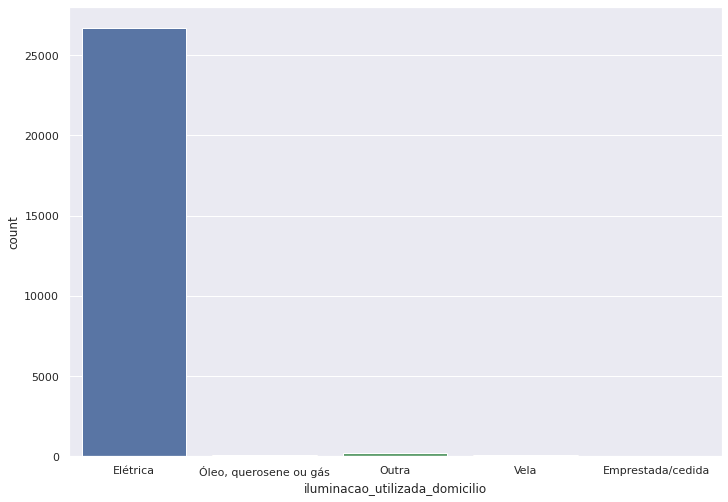

In [ ]:
sns.countplot(df_cm["iluminacao_utilizada_domicilio"]);
prt = df_cm['iluminacao_utilizada_domicilio'].value_counts();
prt

Não                  20737
Sim                   6172
Não sei                191
Emprestada/cedida        1
Name: existem_lugares_para_crianca_brincar_proxima_casa, dtype: int64

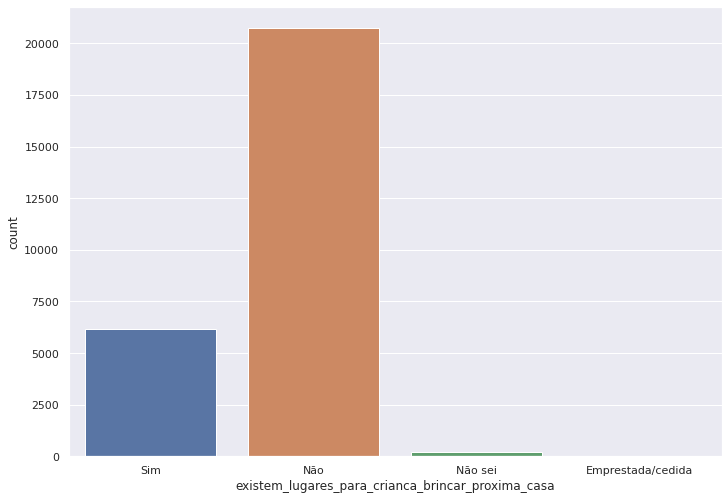

In [ ]:
sns.countplot(df_cm["existem_lugares_para_crianca_brincar_proxima_casa"]);
prt = df_cm['existem_lugares_para_crianca_brincar_proxima_casa'].value_counts();
prt

Não                  20876
Sim                   5962
Não sei                262
Emprestada/cedida        1
Name: existem_locais_para_atividades_esportivas_proxima_casa, dtype: int64

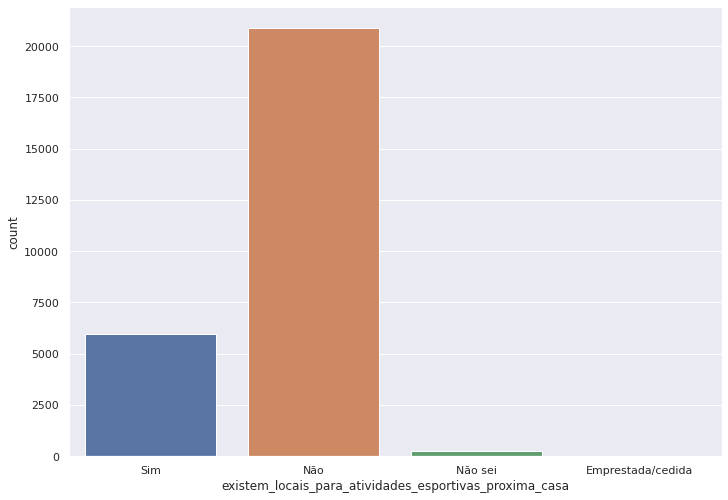

In [ ]:
sns.countplot(df_cm["existem_locais_para_atividades_esportivas_proxima_casa"]);
prt = df_cm["existem_locais_para_atividades_esportivas_proxima_casa"].value_counts();
prt

Não                  25977
Sim                    898
Não sei                225
Emprestada/cedida        1
Name: existem_atividades_culturais_para_jovens_proximo_casa, dtype: int64

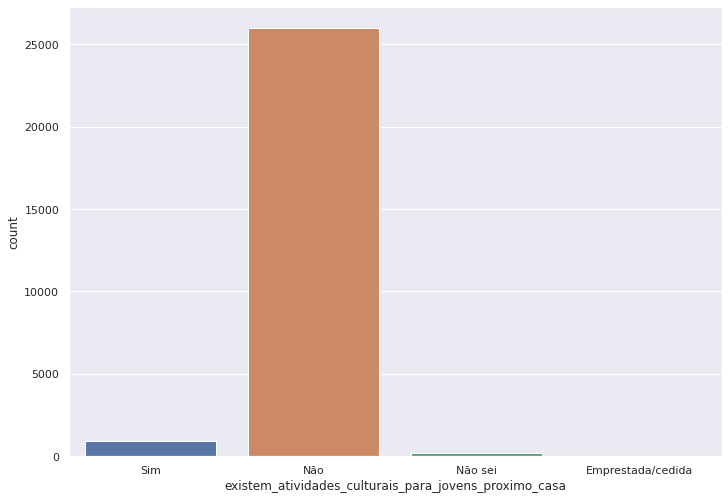

In [ ]:
sns.countplot(df_cm["existem_atividades_culturais_para_jovens_proximo_casa"]);
prt = df_cm["existem_atividades_culturais_para_jovens_proximo_casa"].value_counts();
prt

Sim                  23071
Não                   4029
Emprestada/cedida        1
Name: existe_banheiro, dtype: int64

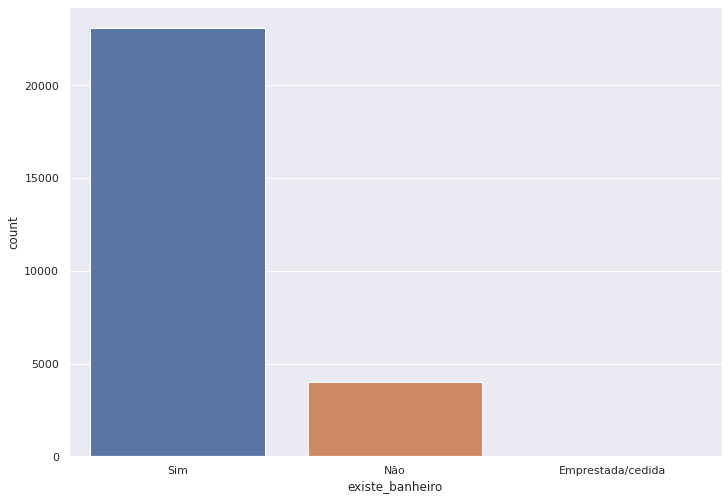

In [ ]:
sns.countplot(df_cm["existe_banheiro"]);
prt = df_cm["existe_banheiro"].value_counts();
prt

In [ ]:
# sns.countplot(df_cm["domicilio_possui_agua_canalizada_pelomenos_umcomodo"]);
# prt = df_cm["domicilio_possui_agua_canalizada_pelomenos_umcomodo"].value_counts();
# prt

Não                  23934
Sim                   2377
Não sei                789
Emprestada/cedida        1
Name: domicilio_localizado_area_violencia, dtype: int64

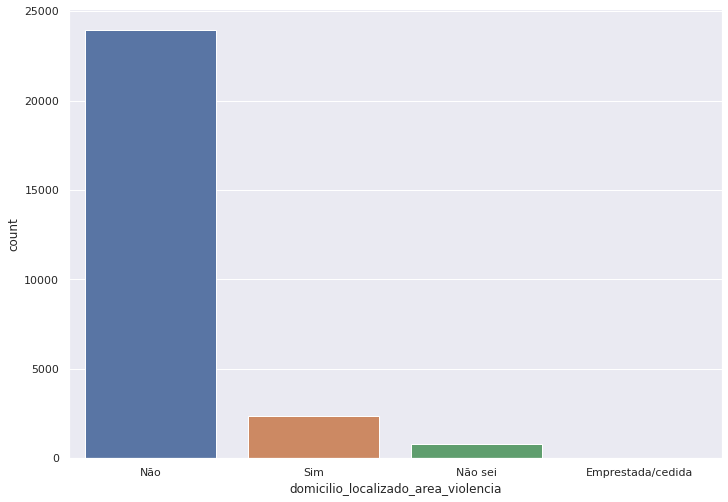

In [ ]:
sns.countplot(df_cm["domicilio_localizado_area_violencia"]);
prt = df_cm["domicilio_localizado_area_violencia"].value_counts();
prt

Gás de botijão       16412
Lenha                 6687
Carvão                3899
Outros                 102
Emprestada/cedida        1
Name: como_vc_cozinha_no_domicilio, dtype: int64

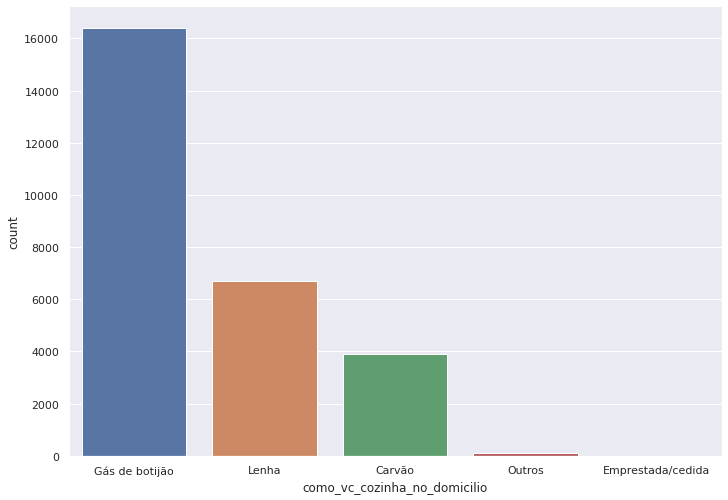

In [ ]:
sns.countplot(df_cm["como_vc_cozinha_no_domicilio"]);
prt = df_cm["como_vc_cozinha_no_domicilio"].value_counts();
prt

Própria              15871
Emprestada/cedida     6686
Alugada               4544
Name: casa_familia_mora_e, dtype: int64

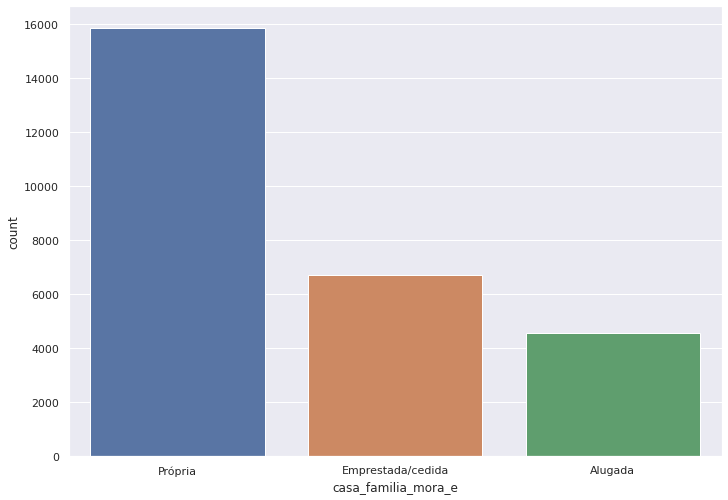

In [ ]:
sns.countplot(df_cm["casa_familia_mora_e"]);
prt = df_cm["casa_familia_mora_e"].value_counts();
prt

### Dados gerais

In [ ]:
df_geral = df[["jotform_id",
'qtd_pessoas_moram_casa#5626',
'estado_civil#95',
'cor_ou_raca#96',
'existe_gravida_domicilio#114',
'mae_mulher_respondeu_pesquisa#16',
'possui_deficiencia#100', 'precipitacao_media_nos_ultimos_sete_anos']]

In [ ]:
df_geral.rename(columns=lambda x: x.split('#')[0], inplace=True)

In [ ]:
df_geral.head(3)

,jotform_id,qtd_pessoas_moram_casa,estado_civil,cor_ou_raca,existe_gravida_domicilio,mae_mulher_respondeu_pesquisa,possui_deficiencia,precipitacao_media_nos_ultimos_sete_anos
0,5105402612321529438,3,Solteira,branco,Não,Mãe,Não possui nenhuma deficiência,695.862488
1,5117490894374472691,3,Solteira,pardo,Não,Mãe,Não possui nenhuma deficiência,695.862488
2,5112331884371457888,3,Solteira,pardo,Não,Mãe,Não possui nenhuma deficiência,695.862488


In [ ]:
df_geral["qtd_pessoas_moram_casa"].unique()

array(['3', '2', '6', None, '4', '1', '5', '9', '8', '7', '12', '10',
       '11', 'Mais de 15', '13', '14'], dtype=object)

In [ ]:
def check_qtd(value: object):
    try:
        value_ = int(value)
        return 'Até 5' if value_ <= 5 else 'Entre 6 e 10' if 6 <= value_ <= 10 else 'Maior que 10'
    except:
        return 'Dado inválido' if value == 'null' \
            else 'Maior que 10' if value == 'Mais de 15' else None

In [ ]:
df_geral['qtd_pessoas_moram_casa'].apply(check_qtd)

0               Até 5
1               Até 5
2               Até 5
3               Até 5
4               Até 5
             ...     
27096           Até 5
27097           Até 5
27098           Até 5
27099           Até 5
27100    Maior que 10
Name: qtd_pessoas_moram_casa, Length: 27101, dtype: object

In [ ]:
df_geral['qtd_pessoas_moram_casa'] = df_geral['qtd_pessoas_moram_casa'].apply(check_qtd)

In [ ]:
df_geral["qtd_pessoas_moram_casa"].unique()

array(['Até 5', 'Entre 6 e 10', None, 'Maior que 10'], dtype=object)

In [ ]:
df_geral = df_geral.rename(columns={'possui_deficiencia' : 'mlr_possui_deficiencia'})

In [ ]:
df_geral["mlr_possui_deficiencia"].unique()

array(['Não possui nenhuma deficiência', 'Física', 'Visual', 'Múltiplas',
       'Auditiva', 'Física; Não possui nenhuma deficiência',
       'Mental ou intelectual',
       'Auditiva; Não possui nenhuma deficiência', None, 'Visual; Física',
       'Visual; Mental ou intelectual',
       'Múltiplas; Não possui nenhuma deficiência',
       'Visual; Não possui nenhuma deficiência',
       'Física; Mental ou intelectual',
       'Visual; Física; Mental ou intelectual; Múltiplas',
       'Mental ou intelectual; Não possui nenhuma deficiência',
       'Auditiva; Física', 'Visual; Auditiva'], dtype=object)

In [ ]:
lista = ['Física; Não possui nenhuma deficiência', 'Auditiva; Não possui nenhuma deficiência', 'Múltiplas; Não possui nenhuma deficiência',
         'Visual; Não possui nenhuma deficiência', 'Visual; Física; Mental ou intelectual; Múltiplas',
         'Mental ou intelectual; Não possui nenhuma deficiência', None]

In [ ]:
df_geral.loc[df_geral["mlr_possui_deficiencia"].isin(lista), "mlr_possui_deficiencia"] = "Dado inválido"

In [ ]:
df_geral["mlr_possui_deficiencia"].unique()

array(['Não possui nenhuma deficiência', 'Física', 'Visual', 'Múltiplas',
       'Auditiva', 'Dado inválido', 'Mental ou intelectual',
       'Visual; Física', 'Visual; Mental ou intelectual',
       'Física; Mental ou intelectual', 'Auditiva; Física',
       'Visual; Auditiva'], dtype=object)

In [ ]:
df_geral.head(3)

,jotform_id,qtd_pessoas_moram_casa,estado_civil,cor_ou_raca,existe_gravida_domicilio,mae_mulher_respondeu_pesquisa,mlr_possui_deficiencia,precipitacao_media_nos_ultimos_sete_anos
0,5105402612321529438,Até 5,Solteira,branco,Não,Mãe,Não possui nenhuma deficiência,695.862488
1,5117490894374472691,Até 5,Solteira,pardo,Não,Mãe,Não possui nenhuma deficiência,695.862488
2,5112331884371457888,Até 5,Solteira,pardo,Não,Mãe,Não possui nenhuma deficiência,695.862488


### Educação


In [ ]:
df_educacao = df[['jotform_id',
 'se_sim_crianca_matriculada_em#5598',
 'se_sim_crianca_matriculada_em#5595',
 'se_sim_crianca_matriculada_em#5592',
 'se_sim_crianca_matriculada_em#5589',
 'se_sim_crianca_matriculada_em#5528',
 'se_sim_crianca_matriculada_em#5525',
 'se_sim_crianca_matriculada_em#5522',
 'se_sim_crianca_matriculada_em#5519',
 'se_sim_crianca_matriculada_em#5516',
 'se_sim_crianca_matriculada_em#5513',
 'se_sim_crianca_matriculada_em#5510',
 'se_sim_crianca_matriculada_em#5499',
 'pre_escola#5527',
 'pre_escola#5521',
 'pre_escola#5515',
 'pre_escola#5498',
 'escola#5597',
 'escola#5594',
 'escola#5591',
 'escola#5588',
 'data_nascimento_crianca4#387',
 'data_nascimento_crianca3#333',
 'data_nascimento_crianca2#279',
 'data_nascimento_crianca1#27',
 'creche#5524',
 'creche#5518',
 'creche#5512',
 'creche#5478']]

In [ ]:
def idade( data_nascimento ):

  if data_nascimento == None:
    return None
  #Ano com dois digitos (exemplo: 19 ao inves de 2019)
  elif len(data_nascimento.split('-')[-1]) == 2:
    data_nascimento = data_nascimento[:-2] + '20' + data_nascimento[-2:]
  #Ano três digitos (erro na digitação, exemplo: 219 ao inves de 213)
  elif len(data_nascimento.split('-')[-1]) == 3:
    data_nascimento = data_nascimento[:-3] + '20' + data_nascimento[-2:]
  #Ano três digitos (erro na digitação, sem a infromação do ano)
  elif  len(data_nascimento.split('-')[-1]) == 0:
    return None

  data_nascimento = datetime.strptime(data_nascimento, "%d-%m-%Y").date()
  hoje = date.today()
  idade_ = hoje.year - hoje.year - ((hoje.month,hoje.day) < (hoje.month,hoje.day))
  return idade_


def escolaridade( escola, pre_escola, creche, idade):

  if (escola is np.NAN) | (escola is None):
    escola = "Não"
  if (creche is np.NAN) | (creche is None):
    creche = "Não"
  if (pre_escola is np.NAN) | (pre_escola is None):
    pre_escola = "Não"
  if (idade is np.NAN) | (idade is None):
    idade = "Dado Inválido"

  if ((escola[:3] == "Sim") & (pre_escola[:3] == "Sim")) | ((escola[:3] == "Sim") & (creche[:3] == "Sim")) | ((creche[:3] == "Sim") & (pre_escola[:3] == "Sim")):
    if idade > 6:
      return "escola"
    if idade > 3:
      return "pre-escola"
    else:
      return "creche"

  elif escola[:3] == "Sim":
    return "escola"

  elif pre_escola[:3] == "Sim":
    return "pre-escola"

  elif creche[:3] == "Sim":
    return "creche"

  else:

    return "nenhum"


In [ ]:
df_educacao_geral = pd.DataFrame(columns=['jotform_id',
                                  'n_filhos',
                                 'n_filhos_estudam',
                                 'n_filhos_creche',
                                 'n_filhos_pre_escola',
                                 'n_filhos_escola'
                                 ])

for i in range(len(df_educacao)):

  crianca1, crianca2, crianca3, crianca4 = None, None, None, None

  ##Crianca1

  if df.loc[i,'data_nascimento_crianca1#27'] is not None:

    idade_1 = idade(df.loc[i,'data_nascimento_crianca1#27'])
    escolaridade_1 = escolaridade( df.loc[i,'escola#5588'], df.loc[i,'pre_escola#5498'], df.loc[i,'creche#5478'], idade_1 )
    #periodo_1 = periodo( df.loc[i,'se_sim_crianca_matriculada_em#5499'], df.loc[i,'se_sim_crianca_matriculada_em#5589'], df.loc[i,'se_sim_crianca_matriculada_em#5510'], escolaridade_1 )
    crianca1 = {'jotform_id': df.loc[i,'jotform_id'], 'idade': idade_1, 'acesso_instituicao_educacao': escolaridade_1}

  ##Crianca2

  if df.loc[i,'data_nascimento_crianca2#279'] is not None:

    idade_2 = idade(df.loc[i,'data_nascimento_crianca2#279'])
    escolaridade_2 = escolaridade( df.loc[i,'escola#5591'], df.loc[i,'pre_escola#5515'], df.loc[i,'creche#5512'], idade_2 )
    crianca2 = {'jotform_id': df.loc[i,'jotform_id'], 'idade': idade_2, 'acesso_instituicao_educacao': escolaridade_2}

  ##Crianca3

  if df.loc[i,'data_nascimento_crianca3#333'] is not None:

    idade_3 = idade(df.loc[i,'data_nascimento_crianca3#333'])
    escolaridade_3 = escolaridade( df.loc[i,'escola#5594'], df.loc[i,'pre_escola#5521'], df.loc[i,'creche#5518'], idade_3 )
    crianca3 = {'jotform_id': df.loc[i,'jotform_id'], 'idade': idade_3, 'acesso_instituicao_educacao': escolaridade_3}

  ##Crianca4

  if df.loc[i,'data_nascimento_crianca4#387'] is not None:

    idade_4 = idade(df.loc[i,'data_nascimento_crianca4#387'])
    escolaridade_4 = escolaridade( df.loc[i,'escola#5597'], df.loc[i,'pre_escola#5527'], df.loc[i,'creche#5524'], idade_4 )
    crianca4 = {'jotform_id': df.loc[i,'jotform_id'], 'idade': idade_4, 'acesso_instituicao_educacao': escolaridade_4}

  n_filhos = (crianca1 is not None and 1 or 0) + (crianca2 is not None and 1 or 0) + (crianca3 is not None and 1 or 0) + (crianca4 is not None and 1 or 0)

  n_filhos_estudam = 0

  n_filhos_creche = 0

  if crianca1 is not None: n_filhos_creche += (crianca1['acesso_instituicao_educacao'] in ["creche"] and 1 or 0)
  if crianca2 is not None: n_filhos_creche += (crianca2['acesso_instituicao_educacao'] in ["creche"] and 1 or 0)
  if crianca3 is not None: n_filhos_creche += (crianca3['acesso_instituicao_educacao'] in ["creche"] and 1 or 0)
  if crianca4 is not None: n_filhos_creche += (crianca4['acesso_instituicao_educacao'] in ["creche"] and 1 or 0)

  n_filhos_pre_escola = 0

  if crianca1 is not None: n_filhos_pre_escola += (crianca1['acesso_instituicao_educacao'] in ["pre_escola"] and 1 or 0)
  if crianca2 is not None: n_filhos_pre_escola += (crianca2['acesso_instituicao_educacao'] in ["pre_escola"] and 1 or 0)
  if crianca3 is not None: n_filhos_pre_escola += (crianca3['acesso_instituicao_educacao'] in ["pre_escola"] and 1 or 0)
  if crianca4 is not None: n_filhos_pre_escola += (crianca4['acesso_instituicao_educacao'] in ["pre_escola"] and 1 or 0)

  n_filhos_escola = 0

  if crianca1 is not None: n_filhos_escola += (crianca1['acesso_instituicao_educacao'] in ["escola"] and 1 or 0)
  if crianca2 is not None: n_filhos_escola += (crianca2['acesso_instituicao_educacao'] in ["escola"] and 1 or 0)
  if crianca3 is not None: n_filhos_escola += (crianca3['acesso_instituicao_educacao'] in ["escola"] and 1 or 0)
  if crianca4 is not None: n_filhos_escola += (crianca4['acesso_instituicao_educacao'] in ["escola"] and 1 or 0)

  n_filhos_estudam = n_filhos_creche + n_filhos_pre_escola + n_filhos_escola

  # if crianca1 is not None: n_filhos_estudam += (crianca1['acesso_instituicao_educacao'] in ["pre_escola","creche","escola"] and 1 or 0)
  # if crianca2 is not None: n_filhos_estudam += (crianca2['acesso_instituicao_educacao'] in ["pre_escola","creche","escola"] and 1 or 0)
  # if crianca3 is not None: n_filhos_estudam += (crianca3['acesso_instituicao_educacao'] in ["pre_escola","creche","escola"] and 1 or 0)
  # if crianca4 is not None: n_filhos_estudam += (crianca4['acesso_instituicao_educacao'] in ["pre_escola","creche","escola"] and 1 or 0)

  linha = {'jotform_id': df.loc[i,'jotform_id'], 'n_filhos': n_filhos, 'n_filhos_estudam': n_filhos_estudam, 'n_filhos_creche': n_filhos_creche, 'n_filhos_pre_escola': n_filhos_pre_escola, 'n_filhos_escola': n_filhos_escola}

  df_educacao_geral = df_educacao_geral.append(linha, ignore_index=True)

In [ ]:
df_educacao_geral.head()

,jotform_id,n_filhos,n_filhos_estudam,n_filhos_creche,n_filhos_pre_escola,n_filhos_escola
0,5105402612321529438,1,0,0,0,0
1,5117490894374472691,2,1,1,0,0
2,5112331884371457888,1,1,1,0,0
3,5110751002329439619,1,1,1,0,0
4,5207337832326078081,1,1,1,0,0


### Juntando datasets

In [ ]:
data = df_ia.merge(df_renda, on='jotform_id', how='inner')

In [ ]:
data = data.merge(df_cm, on='jotform_id', how='inner')

In [ ]:
data = data.merge(df_geral, on='jotform_id', how='inner')

In [ ]:
data = data.merge(df_educacao_geral, on='jotform_id', how='inner')

In [ ]:
data.head(3)

,jotform_id,nos_ultimos_3meses_comida_acabou_antes_de_comprar_mais,nos_ultimos_3meses_teve_medo_que_comida_acabasse_antes_de_comprar_mais,nos_ultimos_3meses_alguem_comeu_menos_que_devia_pq_nao_havia_dinheiro,nos_ultimos_3meses_faltou_dinheiro_para_alimentacao_saudavel,nos_ultimos_3meses_algum_adulto_diminuiu_refeicao_pq_nao_havia_dinheiro,classificacao,zona,ultimos_12meses_alguem_fez_curso_qualificacao,total_ganho_pela_familia_mes_passado,...,cor_ou_raca,existe_gravida_domicilio,mae_mulher_respondeu_pesquisa,mlr_possui_deficiencia,precipitacao_media_nos_ultimos_sete_anos,n_filhos,n_filhos_estudam,n_filhos_creche,n_filhos_pre_escola,n_filhos_escola
0,5105402612321529438,"Sim, alguns dias","Sim, alguns dias","Sim, alguns dias","Sim, alguns dias",Não,Insegurança alimentar moderada,Urbana,Não,300.0,...,branco,Não,Mãe,Não possui nenhuma deficiência,695.862488,1,0,0,0,0
1,5117490894374472691,"Sim, quase todo dia","Sim, quase todo dia",Não,"Sim, quase todo dia",Não,Insegurança alimentar grave,Rural,Não,350.0,...,pardo,Não,Mãe,Não possui nenhuma deficiência,695.862488,2,1,1,0,0
2,5112331884371457888,"Sim, quase todo dia","Sim, quase todo dia",Não,"Sim, quase todo dia",Não,Insegurança alimentar grave,Rural,Não,400.0,...,pardo,Não,Mãe,Não possui nenhuma deficiência,695.862488,1,1,1,0,0


In [ ]:
data.shape

(27025, 44)

### Transformando features categóricas em numéricas

In [ ]:
data.columns

Index(['jotform_id', 'nos_ultimos_3meses_comida_acabou_antes_de_comprar_mais',
       'nos_ultimos_3meses_teve_medo_que_comida_acabasse_antes_de_comprar_mais',
       'nos_ultimos_3meses_alguem_comeu_menos_que_devia_pq_nao_havia_dinheiro',
       'nos_ultimos_3meses_faltou_dinheiro_para_alimentacao_saudavel',
       'nos_ultimos_3meses_algum_adulto_diminuiu_refeicao_pq_nao_havia_dinheiro',
       'classificacao', 'zona',
       'ultimos_12meses_alguem_fez_curso_qualificacao',
       'total_ganho_pela_familia_mes_passado', 'possui_internet', 'municipio',
       'fontes_renda_familia', 'creas', 'cras', 'beneficios',
       'alguem_familia_tem_trab_remunerado', 'iluminacao_utilizada_domicilio',
       'existem_lugares_para_crianca_brincar_proxima_casa',
       'existem_locais_para_atividades_esportivas_proxima_casa',
       'existem_atividades_culturais_para_jovens_proximo_casa',
       'existe_banheiro',
       'domicilio_possui_agua_canalizada_pelomenos_umcomodo',
       'domicilio_loca

In [ ]:
data.drop(['nos_ultimos_3meses_comida_acabou_antes_de_comprar_mais',
       'nos_ultimos_3meses_teve_medo_que_comida_acabasse_antes_de_comprar_mais',
       'nos_ultimos_3meses_alguem_comeu_menos_que_devia_pq_nao_havia_dinheiro',
       'nos_ultimos_3meses_faltou_dinheiro_para_alimentacao_saudavel',
       'nos_ultimos_3meses_algum_adulto_diminuiu_refeicao_pq_nao_havia_dinheiro',
       'mae_mulher_respondeu_pesquisa'], axis=1, inplace=True)

In [ ]:
lista_def_mlr = ['Física', 'Visual', 'Múltiplas',
       'Auditiva', 'Mental ou intelectual',
       'Visual; Física', 'Visual; Mental ou intelectual',
       'Física; Mental ou intelectual', 'Auditiva; Física',
       'Visual; Auditiva']

data.loc[data["mlr_possui_deficiencia"].isin(lista_def_mlr), "mlr_possui_deficiencia"] = 1

lista_def_mlr_nao = ['Não possui nenhuma deficiência', 'Dado inválido']

data.loc[data["mlr_possui_deficiencia"].isin(lista_def_mlr_nao), "mlr_possui_deficiencia"] = 0

In [ ]:
lista_zona = {"Rural": 0, "Urbana": 1, None: 0}

data['zona'] = data['zona'].map(lista_zona)

In [ ]:
lista_sim_nao = {"Não": 0, "Sim": 1, None: 0}

data['possui_internet'] = data['possui_internet'].map(lista_sim_nao)
data['existe_banheiro'] = data['existe_banheiro'].map(lista_sim_nao)
data['domicilio_possui_agua_canalizada_pelomenos_umcomodo'] = data['domicilio_possui_agua_canalizada_pelomenos_umcomodo'].map(lista_sim_nao)
data['existe_gravida_domicilio'] = data[ 'existe_gravida_domicilio'].map(lista_sim_nao)

In [ ]:
lista_nao_sim_nsei = {"Não": 0, "Sim": 1, "Não Sei": 0, None: 0}

data['domicilio_localizado_area_violencia'] = data['domicilio_localizado_area_violencia'].map(lista_nao_sim_nsei)
data['existem_lugares_para_crianca_brincar_proxima_casa'] = data['existem_lugares_para_crianca_brincar_proxima_casa'].map(lista_nao_sim_nsei)
data['existem_locais_para_atividades_esportivas_proxima_casa'] = data['existem_locais_para_atividades_esportivas_proxima_casa'].map(lista_nao_sim_nsei)
data['existem_atividades_culturais_para_jovens_proximo_casa'] = data['existem_atividades_culturais_para_jovens_proximo_casa'].map(lista_nao_sim_nsei)

In [ ]:
lista_nao_sim_nsabe = {"Não": 0, "Sim": 1, "Não sabe": 0}

data['alguem_familia_tem_trab_remunerado'] = data['alguem_familia_tem_trab_remunerado'].map(lista_nao_sim_nsabe)
data['ultimos_12meses_alguem_fez_curso_qualificacao'] = data['ultimos_12meses_alguem_fez_curso_qualificacao'].map(lista_nao_sim_nsabe)

In [ ]:
dict_estado_civil = {'Casada':1, "União estável":1, 'Vive com o parceiro' : 1, 'Solteira' : 0,
                     'Viúva':0, None: 0}
data['estado_civil'] = data['estado_civil'].map(dict_estado_civil).fillna(0).astype(int)

In [ ]:
data.columns

Index(['jotform_id', 'classificacao', 'zona',
       'ultimos_12meses_alguem_fez_curso_qualificacao',
       'total_ganho_pela_familia_mes_passado', 'possui_internet', 'municipio',
       'fontes_renda_familia', 'creas', 'cras', 'beneficios',
       'alguem_familia_tem_trab_remunerado', 'iluminacao_utilizada_domicilio',
       'existem_lugares_para_crianca_brincar_proxima_casa',
       'existem_locais_para_atividades_esportivas_proxima_casa',
       'existem_atividades_culturais_para_jovens_proximo_casa',
       'existe_banheiro',
       'domicilio_possui_agua_canalizada_pelomenos_umcomodo',
       'domicilio_localizado_area_violencia', 'como_vc_cozinha_no_domicilio',
       'casa_familia_mora_e', 'abastecimento_deagua_utilizado_domicilio',
       'agua_utilizada_para_beber_e', 'disponibilidade_alimento_pos_covid',
       'material_predominante_parede_externa_casa',
       'agua_utilizada_para_beber_e', 'se_sim_como_feito_escoamento_banheiro',
       'qtd_pessoas_moram_casa', 'estado_c

In [ ]:
names = ['jotform_id', 'classificacao', 'zona',
       'ultimos_12meses_alguem_fez_curso_qualificacao',
       'total_ganho_pela_familia_mes_passado', 'possui_internet', 'municipio',
       'fontes_renda_familia', 'creas', 'cras', 'beneficios',
       'alguem_familia_tem_trab_remunerado', 'iluminacao_utilizada_domicilio',
       'existem_lugares_para_crianca_brincar_proxima_casa',
       'existem_locais_para_atividades_esportivas_proxima_casa',
       'existem_atividades_culturais_para_jovens_proximo_casa',
       'existe_banheiro',
       'domicilio_possui_agua_canalizada_pelomenos_umcomodo',
       'domicilio_localizado_area_violencia', 'como_vc_cozinha_no_domicilio',
       'casa_familia_mora_e', 'abastecimento_deagua_utilizado_domicilio',
       'agua_utilizada_para_beber_e1', 'disponibilidade_alimento_pos_covid',
       'material_predominante_parede_externa_casa',
       'agua_utilizada_para_beber_e2', 'se_sim_como_feito_escoamento_banheiro',
       'qtd_pessoas_moram_casa', 'estado_civil', 'cor_ou_raca',
       'existe_gravida_domicilio', 'mlr_possui_deficiencia',
       'precipitacao_media_nos_ultimos_sete_anos', 'n_filhos',
       'n_filhos_estudam', 'n_filhos_creche', 'n_filhos_pre_escola',
       'n_filhos_escola']

In [ ]:
data.columns = names

In [ ]:
data.drop('agua_utilizada_para_beber_e2',axis=1, inplace=True)

In [ ]:
data.rename(columns={'agua_utilizada_para_beber_e1':'agua_utilizada_para_beber_e'}, inplace=True)

In [ ]:
dict_agua_potavel = {'Filtrada':1,
                     'Água mineral':1,
                     'Tratada de outra forma': 0,
                     'Fervida': 0,
                     'Sem tratamento': 0}
data['agua_utilizada_para_beber_e'] = data['agua_utilizada_para_beber_e'].map(dict_agua_potavel).astype(int)

In [ ]:
dict_escoamento_banheiro = {'Fossa séptica' : 1,
                            None: 0,
                            'Fossa rudimentar' : 1,
                            'Rede coletora de esgoto ou pluvial': 1,
                            'Vala a céu aberto': 0,
                            'Outra': 0,
                            'Direto para um rio, lago ou açude': 0}
data['se_sim_como_feito_escoamento_banheiro'] = data['se_sim_como_feito_escoamento_banheiro'].map(dict_escoamento_banheiro).astype(int)

In [ ]:
lista_iluminacao = ['Elétrica']

data.loc[data["iluminacao_utilizada_domicilio"].isin(lista_iluminacao), "iluminacao_utilizada_domicilio"] = 1

lista_iluminacao_nao = ['Óleo, querosene ou gás', 'Outra', 'Vela']

data.loc[data["iluminacao_utilizada_domicilio"].isin(lista_iluminacao_nao), "iluminacao_utilizada_domicilio"] = 0

In [ ]:
lista_cras = ['Sim']

data.loc[data["cras"].isin(lista_cras), "cras"] = 1

lista_cras_nao = ['Não', 'Não sei']

data.loc[data["cras"].isin(lista_cras_nao), "cras"] = 0

In [ ]:
lista_creas = ['Sim']

data.loc[data["creas"].isin(lista_creas), "creas"] = 1

lista_creas_nao = ['O município não possui CREAS', 'Não', 'Não sei']

data.loc[data["creas"].isin(lista_creas_nao), "creas"] = 0

In [ ]:
lista_material_parede = ['Alvenaria com revestimento']

data.loc[data["material_predominante_parede_externa_casa"].isin(lista_material_parede), "material_predominante_parede_externa_casa"] = 1

lista_material_parede_nao = ['Taipa não revestida', 'Alvenaria sem revestimento', 'Taipa revestida', 'Outro', 'Palha',
       'Madeira aproveitada']

data.loc[data["material_predominante_parede_externa_casa"].isin(lista_material_parede_nao), "material_predominante_parede_externa_casa"] = 0

In [ ]:
data.loc[data.como_vc_cozinha_no_domicilio == "Gás de botijão", "como_vc_cozinha_no_domicilio"] = 1
data.loc[data.como_vc_cozinha_no_domicilio == "Lenha", "como_vc_cozinha_no_domicilio"] = 0
data.loc[data.como_vc_cozinha_no_domicilio == "Carvão", "como_vc_cozinha_no_domicilio"] = 0
data.loc[data.como_vc_cozinha_no_domicilio == "Outros", "como_vc_cozinha_no_domicilio"] = 0
#--------------------------------------------------------------
data.loc[data.casa_familia_mora_e == "Própria", "casa_familia_mora_e"] = 1
data.loc[data.casa_familia_mora_e == "Emprestada/cedida", "casa_familia_mora_e"] = 0
data.loc[data.casa_familia_mora_e == "Alugada", "casa_familia_mora_e"] = 0
#--------------------------------------------------------------
data.loc[data.abastecimento_deagua_utilizado_domicilio == "Rede geral de distribuição", "abastecimento_deagua_utilizado_domicilio"] = 1
data.loc[data.abastecimento_deagua_utilizado_domicilio == "Poço ou nascente", "abastecimento_deagua_utilizado_domicilio"] = 0
data.loc[data.abastecimento_deagua_utilizado_domicilio == "Cisterna", "abastecimento_deagua_utilizado_domicilio"] = 0
data.loc[data.abastecimento_deagua_utilizado_domicilio == "Outra forma", "abastecimento_deagua_utilizado_domicilio"] = 0
data.loc[data.abastecimento_deagua_utilizado_domicilio == "Não sei", "abastecimento_deagua_utilizado_domicilio"] = 0
#--------------------------------------------------------------
data.loc[data.disponibilidade_alimento_pos_covid == "Sim, diminuiu", "disponibilidade_alimento_pos_covid"] = 1
data.loc[data.disponibilidade_alimento_pos_covid == "Não mudou", "disponibilidade_alimento_pos_covid"] = 0
data.loc[data.disponibilidade_alimento_pos_covid == "Sim, aumentou", "disponibilidade_alimento_pos_covid"] = 0


In [ ]:
# Diminuindo as labels da classificação para duas

lista_ia = ['Insegurança alimentar moderada', 'Insegurança alimentar grave', 'Insegurança alimentar leve']

data.loc[data["classificacao"].isin(lista_ia), "classificacao"] = 1

lista_nao_ia = ['Fora de insegurança alimentar']

data.loc[data["classificacao"].isin(lista_nao_ia), "classificacao"] = 0

In [ ]:
le = LabelEncoder()

In [ ]:
data['cor_ou_raca_encoded'] = le.fit_transform(data['cor_ou_raca'])

In [ ]:
df['qtd_pessoas_moram_casa_encoded'] = le.fit_transform(data['qtd_pessoas_moram_casa'])

In [ ]:
data = data.astype({'n_filhos_pre_escola':'float32', 'n_filhos_estudam': 'float32', 'n_filhos_escola':'float32', 'n_filhos_creche':'float32', 'cras':'float32',
                    'creas': 'float32', 'casa_familia_mora_e': 'float32', 'como_vc_cozinha_no_domicilio': 'float32', 'abastecimento_deagua_utilizado_domicilio' : 'float32',
                      'disponibilidade_alimento_pos_covid':'float32', 'material_predominante_parede_externa_casa':'float32', 'mlr_possui_deficiencia':'float32',
                     'n_filhos': 'float32', 'iluminacao_utilizada_domicilio': 'float32', 'classificacao': 'int'})

In [ ]:
data.dtypes

jotform_id                                                 object
classificacao                                               int64
zona                                                      float64
ultimos_12meses_alguem_fez_curso_qualificacao               int64
total_ganho_pela_familia_mes_passado                      float64
possui_internet                                             int64
municipio                                                  object
fontes_renda_familia                                       object
creas                                                     float32
cras                                                      float32
beneficios                                                 object
alguem_familia_tem_trab_remunerado                          int64
iluminacao_utilizada_domicilio                            float32
existem_lugares_para_crianca_brincar_proxima_casa         float64
existem_locais_para_atividades_esportivas_proxima_casa    float64
existem_at

## Analises

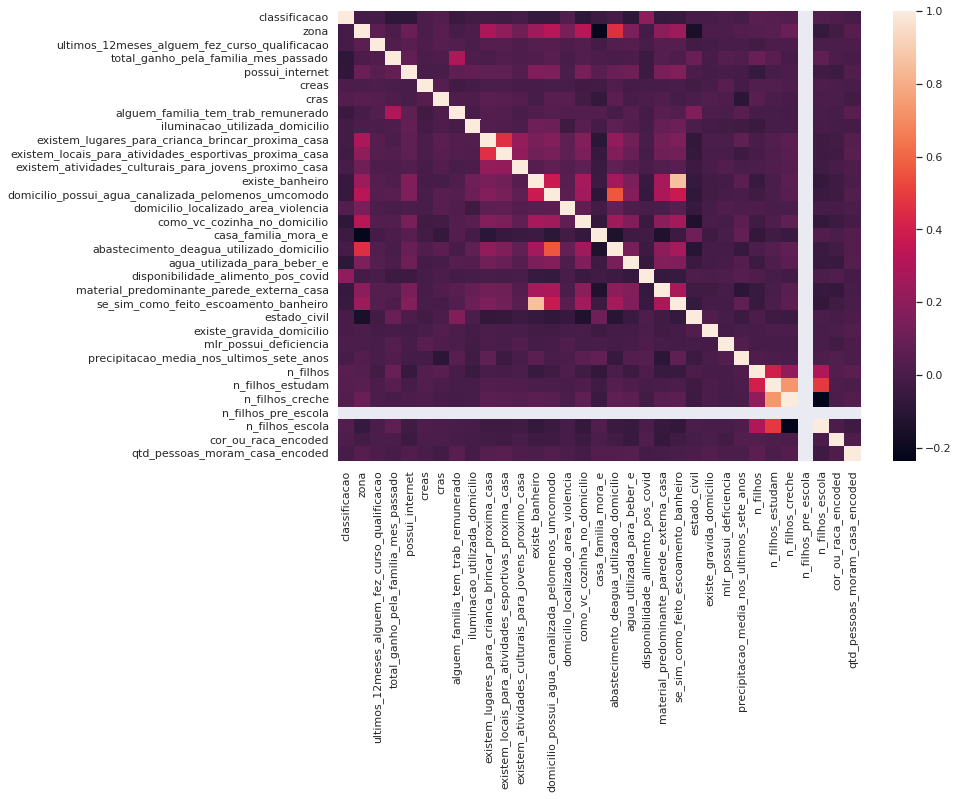

In [ ]:
sns.heatmap(data.corr());

In [ ]:
data.head()

,jotform_id,classificacao,zona,ultimos_12meses_alguem_fez_curso_qualificacao,total_ganho_pela_familia_mes_passado,possui_internet,municipio,fontes_renda_familia,creas,cras,...,existe_gravida_domicilio,mlr_possui_deficiencia,precipitacao_media_nos_ultimos_sete_anos,n_filhos,n_filhos_estudam,n_filhos_creche,n_filhos_pre_escola,n_filhos_escola,cor_ou_raca_encoded,qtd_pessoas_moram_casa_encoded
0,5105402612321529438,1,1.0,0,300.0,1,Itaiçaba,Bolsa família / Cartão Mais Infância,0.0,0.0,...,0,0.0,695.862488,1.0,0.0,0.0,0.0,0.0,1,0
1,5117490894374472691,1,0.0,0,350.0,1,Itaiçaba,Bolsa família / Cartão Mais Infância,0.0,1.0,...,0,0.0,695.862488,2.0,1.0,1.0,0.0,0.0,3,0
2,5112331884371457888,1,0.0,0,400.0,0,Itaiçaba,Bolsa família / Cartão Mais Infância,0.0,1.0,...,0,0.0,695.862488,1.0,1.0,1.0,0.0,0.0,3,0
3,5110751002329439619,0,1.0,0,280.0,0,Itaiçaba,Bolsa família / Cartão Mais Infância; ATIVIDAD...,0.0,0.0,...,0,0.0,695.862488,1.0,1.0,1.0,0.0,0.0,3,0
4,5207337832326078081,0,0.0,0,364.0,0,Itaiçaba,Bolsa família / Cartão Mais Infância,0.0,0.0,...,0,0.0,695.862488,1.0,1.0,1.0,0.0,0.0,3,0


In [ ]:
data.columns

Index(['jotform_id', 'classificacao', 'zona',
       'ultimos_12meses_alguem_fez_curso_qualificacao',
       'total_ganho_pela_familia_mes_passado', 'possui_internet', 'municipio',
       'fontes_renda_familia', 'creas', 'cras', 'beneficios',
       'alguem_familia_tem_trab_remunerado', 'iluminacao_utilizada_domicilio',
       'existem_lugares_para_crianca_brincar_proxima_casa',
       'existem_locais_para_atividades_esportivas_proxima_casa',
       'existem_atividades_culturais_para_jovens_proximo_casa',
       'existe_banheiro',
       'domicilio_possui_agua_canalizada_pelomenos_umcomodo',
       'domicilio_localizado_area_violencia', 'como_vc_cozinha_no_domicilio',
       'casa_familia_mora_e', 'abastecimento_deagua_utilizado_domicilio',
       'agua_utilizada_para_beber_e', 'disponibilidade_alimento_pos_covid',
       'material_predominante_parede_externa_casa',
       'se_sim_como_feito_escoamento_banheiro', 'qtd_pessoas_moram_casa',
       'estado_civil', 'cor_ou_raca', 'existe_g

In [ ]:
data.isna().sum()

jotform_id                                                   0
classificacao                                                0
zona                                                       107
ultimos_12meses_alguem_fez_curso_qualificacao                0
total_ganho_pela_familia_mes_passado                         1
possui_internet                                              0
municipio                                                    0
fontes_renda_familia                                         0
creas                                                        0
cras                                                         0
beneficios                                                   0
alguem_familia_tem_trab_remunerado                           0
iluminacao_utilizada_domicilio                               0
existem_lugares_para_crianca_brincar_proxima_casa          191
existem_locais_para_atividades_esportivas_proxima_casa     262
existem_atividades_culturais_para_jovens_proximo_casa  

In [ ]:
soma = 107 + 1 + 191 + 262 + 225 + 787 + 5544 + 27
soma

7144

In [ ]:
# Regra de três
porcentagem_linhas_nulas = (100*soma) / data.shape[0]
porcentagem_linhas_nulas

26.434782608695652

In [ ]:
# Isso quer dizer que no máximo aproximadamente 26% das instâncias tem algum valor da coluna nulo

In [ ]:
data.shape

(27025, 39)

In [ ]:
nulos = 27025 - 20494
pn = (100*nulos) / 27025
pn

24.166512488436634

In [ ]:
total_teste = 13204 + 1141

In [ ]:

pc1 = (100*13204) / total_teste
pc1

92.04600906239108

In [ ]:
# Excluindo linhas que têm algum atributo nulo
data_clean = data.copy()
data_clean.dropna(inplace=True)

# Excluindo colunas não numéricas que sobraram
data_clean.drop(['jotform_id', 'municipio', 'fontes_renda_familia', 'beneficios', 'qtd_pessoas_moram_casa', 'cor_ou_raca'], axis=1, inplace=True)
data_clean.shape

(20494, 33)

In [ ]:
# Distribuição das classes

data_clean['classificacao'].value_counts()

1    18848
0     1646
Name: classificacao, dtype: int64

In [ ]:
# Resultado acima mostra que os dados são desbalanceados.

## Modelo baseline do checkpoint 2

In [ ]:
X = data_clean.copy()
X.drop(['classificacao'], axis=1, inplace=True)

y = data_clean['classificacao']

# Dividindo e embaralhando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state = 42)

Acurácia:  0.917872824849569


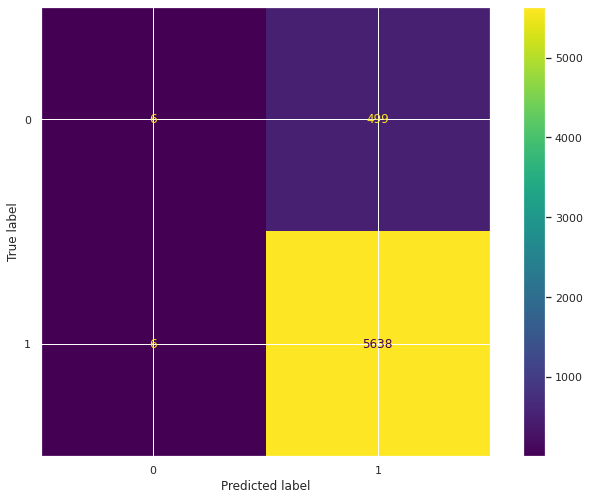

In [ ]:
# Regressão Logística com todas as features e dataset desbalanceado

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_pred_LR_model = LR_model.predict(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_LR_model))

plot_confusion_matrix(LR_model, X_test, y_test)

Acurácia:  0.866319726784843


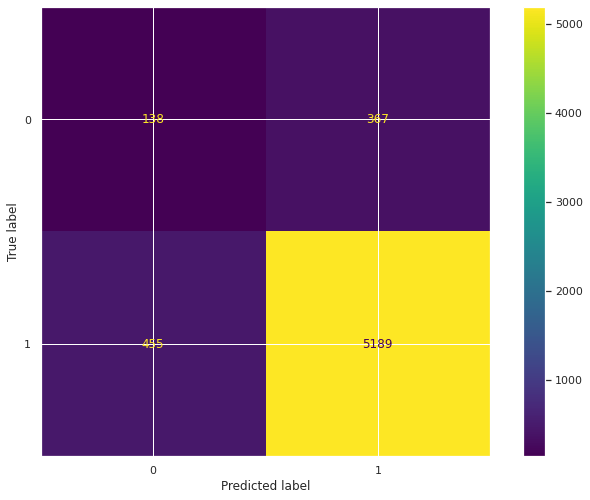

In [ ]:
# Árvore de Decisão com todas as features e dataset desbalanceado

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred_DT_model = DT_model.predict(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_DT_model))

plot_confusion_matrix(DT_model, X_test, y_test)

# Checkpoint 3

## Selecionando features importantes a partir do RF

In [ ]:
# Random Forest

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_pred_RF_model = RF_model.predict(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_RF_model))

Acurácia:  0.9238900634249472


In [ ]:
RF_model.feature_importances_

array([0.02786371, 0.01328669, 0.18978117, 0.02405575, 0.00169648,
       0.03113866, 0.01988057, 0.00357195, 0.02521542, 0.02584609,
       0.00538613, 0.00756512, 0.01704816, 0.01312763, 0.0206937 ,
       0.0308684 , 0.02694403, 0.02227404, 0.05561577, 0.02104323,
       0.01153978, 0.0342258 , 0.01027043, 0.00514722, 0.19817044,
       0.03120187, 0.0280162 , 0.02523105, 0.        , 0.01893705,
       0.04468068, 0.00967677])

Text(0.5, 1.0, 'Importância de cada feature')

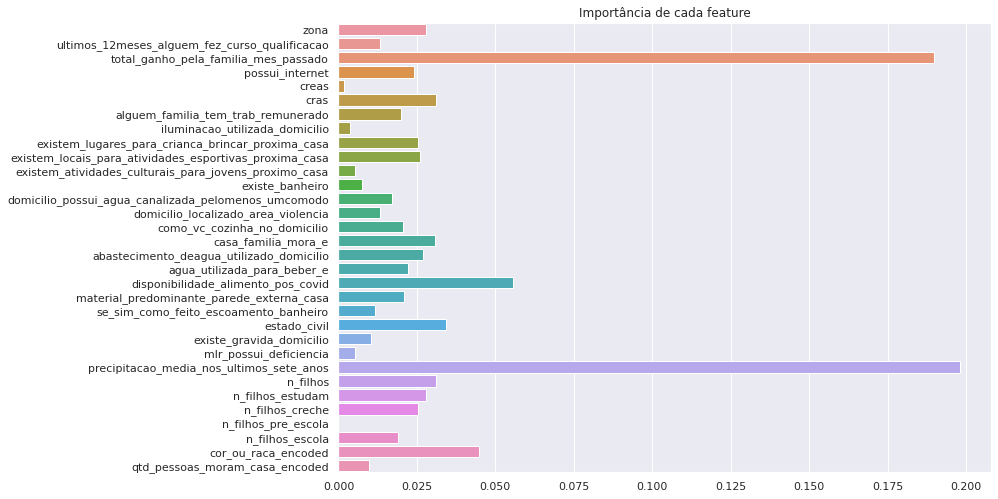

In [ ]:
importances = RF_model.feature_importances_
features = RF_model.feature_names_in_

sns.barplot(x= importances, y= features, orient='h').set_title('Importância de cada feature')

In [ ]:
data_importance = data_clean[["precipitacao_media_nos_ultimos_sete_anos", "total_ganho_pela_familia_mes_passado", "disponibilidade_alimento_pos_covid",
                              "estado_civil", "n_filhos", "cor_ou_raca_encoded", "classificacao"]]

In [ ]:
data_importance.shape

(20494, 7)

### Normalizar features necessárias

In [ ]:
data_importance.head()

,precipitacao_media_nos_ultimos_sete_anos,total_ganho_pela_familia_mes_passado,disponibilidade_alimento_pos_covid,estado_civil,n_filhos,cor_ou_raca_encoded,classificacao
0,695.862488,300.0,1.0,0,1.0,1,1
1,695.862488,350.0,1.0,0,2.0,3,1
2,695.862488,400.0,1.0,0,1.0,3,1
3,695.862488,280.0,0.0,0,1.0,3,0
4,695.862488,364.0,0.0,1,1.0,3,0


In [ ]:
data_importance["precipitacao_media_nos_ultimos_sete_anos"] = data_importance["precipitacao_media_nos_ultimos_sete_anos"] / data_importance["precipitacao_media_nos_ultimos_sete_anos"].abs().max()

In [ ]:
data_importance["total_ganho_pela_familia_mes_passado"] = data_importance["total_ganho_pela_familia_mes_passado"] / data_importance["total_ganho_pela_familia_mes_passado"].abs().max()

In [ ]:
data_importance.head()

,precipitacao_media_nos_ultimos_sete_anos,total_ganho_pela_familia_mes_passado,disponibilidade_alimento_pos_covid,estado_civil,n_filhos,cor_ou_raca_encoded,classificacao
0,0.462801,0.150,1.0,0,1.0,1,1
1,0.462801,0.175,1.0,0,2.0,3,1
2,0.462801,0.200,1.0,0,1.0,3,1
3,0.462801,0.140,0.0,0,1.0,3,0
4,0.462801,0.182,0.0,1,1.0,3,0


### Balanceando os dados

In [ ]:
# Como nossos dados são desbalanceados, vamos usar uma tecnica de balancemaento de dados para balanceá-los: Oversampling
# O Oversampling consiste em criar sinteticamente novas observações da classe minoritária, com o objetivo de igualar a proporção das categorias.

#### Random OverSampling

In [ ]:
X = data_importance.copy()
X.drop(['classificacao'], axis=1, inplace=True)

y = data_importance['classificacao']

# Dividindo e embaralhando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state = 42)


In [ ]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (14345, 6) y: (14345,)
TESTE:
X: (6149, 6) y: (6149,)


In [ ]:
y_train.value_counts()

1    13204
0     1141
Name: classificacao, dtype: int64

In [ ]:
y_test.value_counts()

1    5644
0     505
Name: classificacao, dtype: int64

In [ ]:
# Avaliando modelo com Gradient Boosting com os dados não balanceados

gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.3, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred_gb_clf = gb_clf.predict(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_gb_clf))
print('AUC: ', roc_auc_score(y_test, y_pred_gb_clf))
print("F1 Score", f1_score(y_test, y_pred_gb_clf, average='macro'))


Acurácia:  0.9198243616848268
AUC:  0.5686762776206749
F1 Score 0.5954910253510565


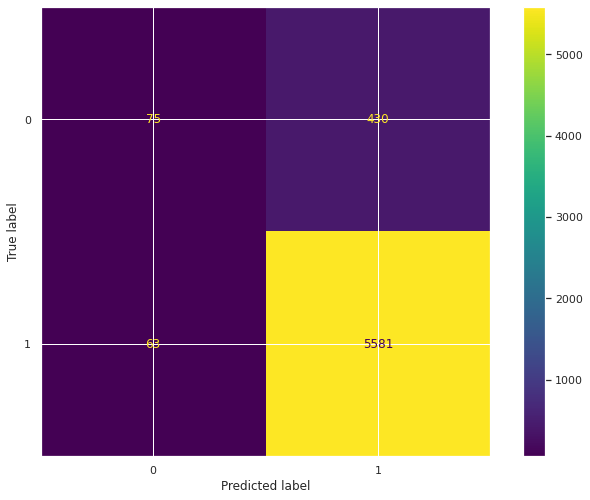

In [ ]:
plot_confusion_matrix(gb_clf, X_test, y_test);

#### Agora vamos balancear os dados

In [ ]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (14345, 6) y: (14345,)
TESTE:
X: (6149, 6) y: (6149,)


In [ ]:
y_train.value_counts()

1    13204
0     1141
Name: classificacao, dtype: int64

In [ ]:
print("Reamostragem de dados usando RandomOverSampler (ROS):")
ros = RandomOverSampler(random_state=42)

# Devemos aplicar apenas para os dados de treino
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)

print("X ROS:", len(X_ROS))
print("Y ROS:", len(y_ROS))

Reamostragem de dados usando Random OverSampling (ROS):
X ROS: 26408
Y ROS: 26408


In [ ]:
y_ROS.value_counts()

1    13204
0    13204
Name: classificacao, dtype: int64

In [ ]:
# Avaliando modelo com Gradient Boosting agora com os dados BALANCEADOS

gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.3, random_state=42)
gb_clf.fit(X_ROS, y_ROS)

y_pred_gb_clf = gb_clf.predict(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_gb_clf))
print('AUC: ', roc_auc_score(y_test, y_pred_gb_clf))
print("F1 Score:", f1_score(y_test, y_pred_gb_clf, average='macro'))


Acurácia:  0.8009432428037079
AUC:  0.7004462813396861
F1 Score: 0.6035260502926786


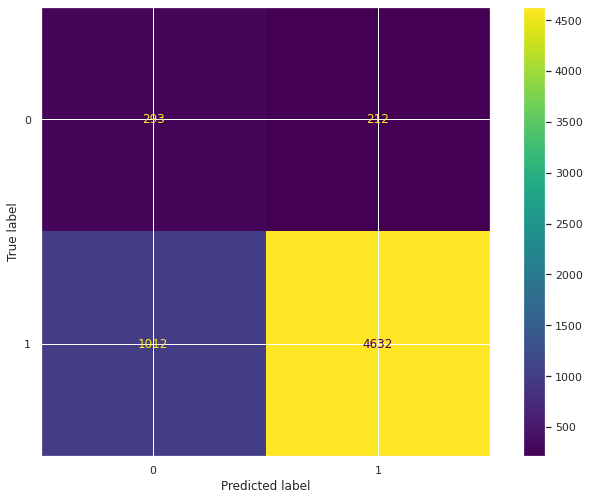

In [ ]:
plot_confusion_matrix(gb_clf, X_test, y_test);

### Rodando modelos com as features importantes e dados balanceados

In [ ]:
def plot_roc_curve(fpers, tpers, aucs, n):
  colors = ["red", "blue", "pink", "orange", "black"]
  for i in range(len(aucs)):
    fper = fpers[i]
    tper = tpers[i]
    auc = aucs[i]
    label_ = 'ROC {} (AUC {:.4f})'.format(n[i],auc)
    plt.plot(fper, tper, color=colors[i], label=label_)
  plt.plot([0, 1], [0, 1], color='green', linestyle='--')
  plt.xlabel('Taxa de Falso Positivo')
  plt.ylabel('Taxa de Verdadeiro Positivo')
  plt.title('Curva de Característica de Operação do Receptor (ROC)')
  plt.legend()
  plt.show()

Acurácia:  0.7981785656204261
AUC: 0.6331

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.1871    0.4356    0.2617       505
           1     0.9427    0.8306    0.8831      5644

    accuracy                         0.7982      6149
   macro avg     0.5649    0.6331    0.5724      6149
weighted avg     0.8806    0.7982    0.8321      6149



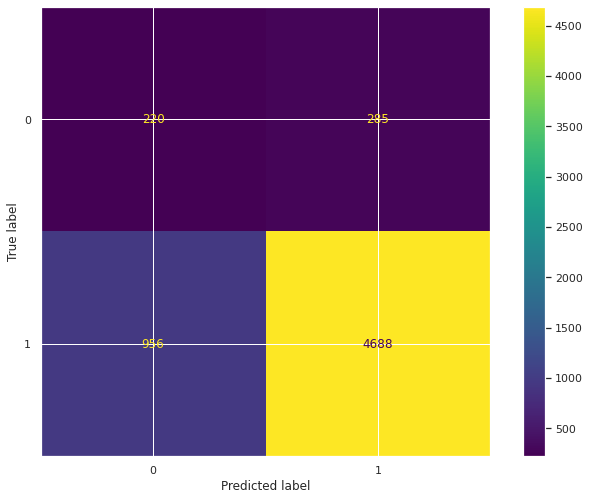

In [ ]:
# Regressão Logística

LR_model2 = LogisticRegression()
LR_model2.fit(X_ROS, y_ROS)
y_pred_LR_model2 = LR_model2.predict(X_test)
y_pred_LR_model2_prob = LR_model2.predict_proba(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_LR_model2))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_LR_model2)))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_LR_model2, digits=4))

# plotar a matrix de confusão
plot_confusion_matrix(LR_model2, X_test, y_test)

Matriz de confusão da Regressão Logística

Para a classe 0 (Primeira linha da matriz de confusão):
- O modelo acertou 220 de 505, correspondente a 43.56 % dos casos.


Para a classe 1 (Segunda linha da matriz de confusão):
- O modelo acertou 4688 de 5644, correspondente a 83.06% dos casos.

In [ ]:
y_pred_LR_model2_prob.shape

(6149, 2)

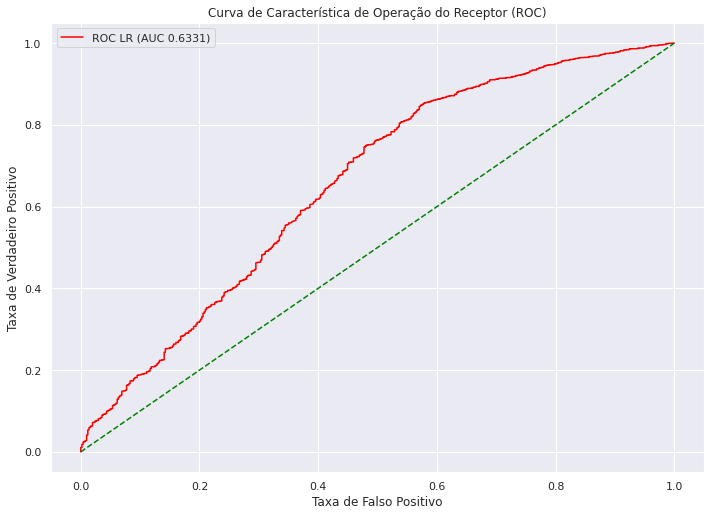

In [ ]:
fper_LR, tper_LR, _ = roc_curve(y_test, y_pred_LR_model2_prob[:, 1])
auc_LR = roc_auc_score(y_test, y_pred_LR_model2)
plot_roc_curve([fper_LR], [tper_LR], [auc_LR],["LR"])

In [ ]:
# Vamos usar Croos Validation para Regressão Logística

teste = cross_val_score(LR_model2, X, y, scoring='accuracy', cv=20)
teste

array([0.91902439, 0.92      , 0.92      , 0.92195122, 0.91707317,
       0.92      , 0.92      , 0.92      , 0.92      , 0.91902439,
       0.91707317, 0.92      , 0.91902439, 0.91902439, 0.91992188,
       0.91894531, 0.91992188, 0.92285156, 0.91992188, 0.91992188])

In [ ]:
teste.mean()

0.9196839748475611

Acurácia:  0.8521710847292243
AUC: 0.6130

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.2248    0.3267    0.2663       505
           1     0.9372    0.8992    0.9178      5644

    accuracy                         0.8522      6149
   macro avg     0.5810    0.6130    0.5921      6149
weighted avg     0.8787    0.8522    0.8643      6149



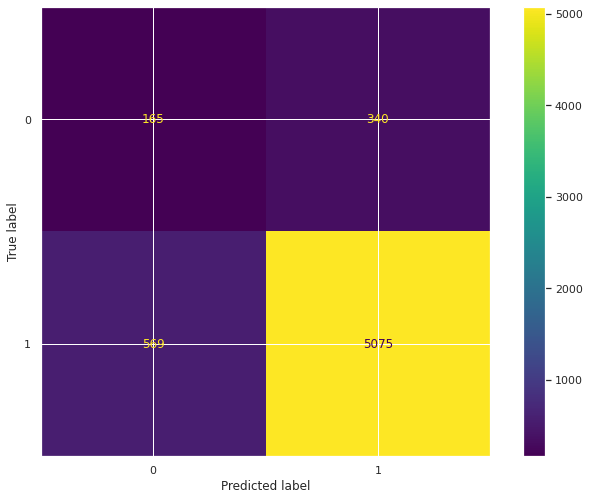

In [ ]:
# Árvore de Decisão

DT_model2 = tree.DecisionTreeClassifier()
DT_model2.fit(X_ROS, y_ROS)
y_pred_DT_model2 = DT_model2.predict(X_test)
y_pred_DT_model2_prob = DT_model2.predict_proba(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_DT_model2))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_DT_model2)))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_DT_model2, digits=4))

# plotar a matrix de confusão
plot_confusion_matrix(DT_model2, X_test, y_test)

Matriz de confusão da Árvore de Decisão

Para a classe 0 (Primeira linha da matriz de confusão):
- O modelo acertou 166 de 505, correspondente a 32.87% dos casos.


Para a classe 1 (Segunda linha da matriz de confusão):
- O modelo acertou 5073 de 5644, correspondente a 89.88% dos casos.


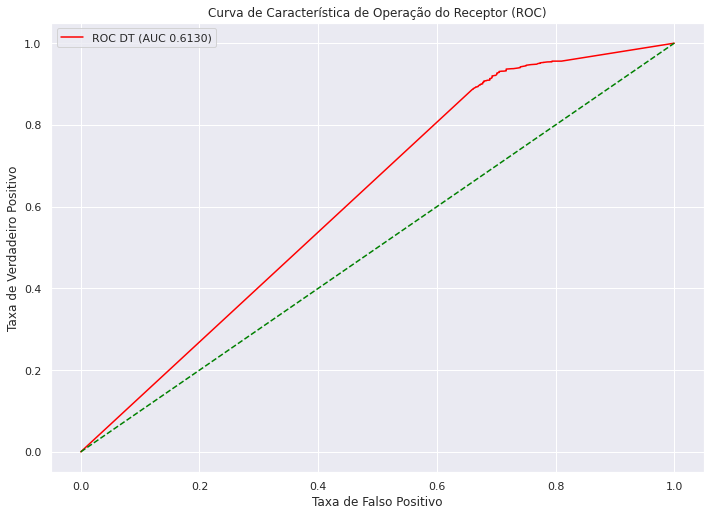

In [ ]:
fper_DT, tper_DT, _ = roc_curve(y_test, y_pred_DT_model2_prob[:, 1])
auc_DT = roc_auc_score(y_test, y_pred_DT_model2)
plot_roc_curve([fper_DT], [tper_DT], [auc_DT], ["DT"])

In [ ]:
# Vamos usar Croos Validation para Árvore de Decisão

teste2 = cross_val_score(DT_model2, X, y, scoring='accuracy', cv=20)
teste2

array([0.62926829, 0.82634146, 0.85073171, 0.73658537, 0.59414634,
       0.65268293, 0.78341463, 0.71707317, 0.71219512, 0.3297561 ,
       0.36682927, 0.72487805, 0.52390244, 0.54829268, 0.47558594,
       0.65136719, 0.484375  , 0.63085938, 0.62109375, 0.83398438])

In [ ]:
teste2.mean()

0.6346681592987805

#### Boosting

Acurácia:  0.8022442673605464
AUC: 0.6876

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.2194    0.5505    0.3138       505
           1     0.9535    0.8248    0.8845      5644

    accuracy                         0.8022      6149
   macro avg     0.5865    0.6876    0.5991      6149
weighted avg     0.8932    0.8022    0.8376      6149



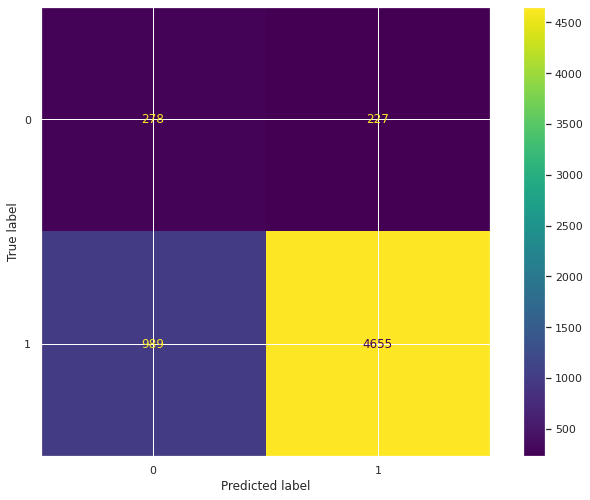

In [ ]:
# Gradient Boosting

gb_clf2 = GradientBoostingClassifier(n_estimators=99, learning_rate=0.3, random_state=42)
gb_clf2.fit(X_ROS, y_ROS)
y_pred_gb_clf2 = gb_clf2.predict(X_test)
y_pred_gb_clf2_prob = gb_clf2.predict_proba(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_gb_clf2))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_gb_clf2)))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_gb_clf2, digits=4))

# plotar a matrix de confusão
plot_confusion_matrix(gb_clf2, X_test, y_test)

Matriz de confusão Gradient Boosting

Para a classe 0 (Primeira linha da matriz de confusão):
- O modelo acertou 278 de 505, correspondente a 55.05% dos casos.


Para a classe 1 (Segunda linha da matriz de confusão):
- O modelo acertou 4655 de 5644, correspondente a 82.48% dos casos.

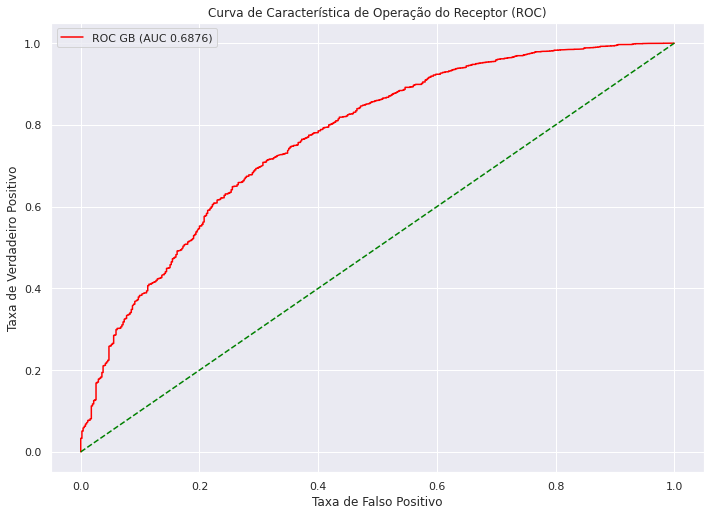

In [ ]:
fper_GB, tper_GB, _ = roc_curve(y_test, y_pred_gb_clf2_prob[:, 1])
auc_GB = roc_auc_score(y_test, y_pred_gb_clf2)
plot_roc_curve([fper_GB], [tper_GB], [auc_GB], ["GB"])

In [ ]:
# Vamos usar Croos Validation para Gradient Boosting

teste3 = cross_val_score(gb_clf2, X, y, scoring='accuracy', cv=20)
teste3

array([0.76780488, 0.92      , 0.91512195, 0.90731707, 0.58536585,
       0.61170732, 0.7795122 , 0.73170732, 0.45658537, 0.52097561,
       0.31804878, 0.81463415, 0.54341463, 0.37853659, 0.6015625 ,
       0.75390625, 0.57519531, 0.42871094, 0.60742188, 0.90722656])

In [ ]:
teste3.mean()

0.6562377572408536

Acurácia:  0.8063099691006668
AUC: 0.6745

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.2161    0.5168    0.3047       505
           1     0.9506    0.8322    0.8875      5644

    accuracy                         0.8063      6149
   macro avg     0.5833    0.6745    0.5961      6149
weighted avg     0.8903    0.8063    0.8396      6149



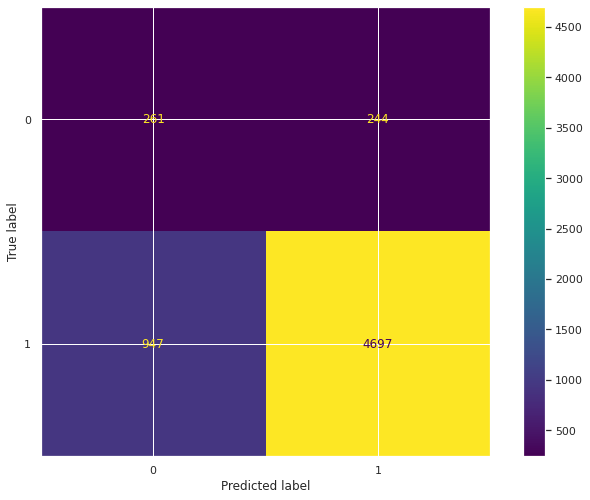

In [ ]:
# XGBoosting

xgb_model2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model2.fit(X_ROS, y_ROS)
y_pred_xgb_model2 = xgb_model2.predict(X_test)
y_pred_xgb_model2_prob = xgb_model2.predict_proba(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_xgb_model2))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_xgb_model2)))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb_model2, digits=4))

# plotar a matrix de confusão
plot_confusion_matrix(xgb_model2, X_test, y_test)

Matriz de confusão XGBoosting

Para a classe 0 (Primeira linha da matriz de confusão):
- O modelo acertou 261 de 505, correspondente a 51.68% dos casos.


Para a classe 1 (Segunda linha da matriz de confusão):
- O modelo acertou 4697 de 5644, correspondente a 83.22% dos casos.

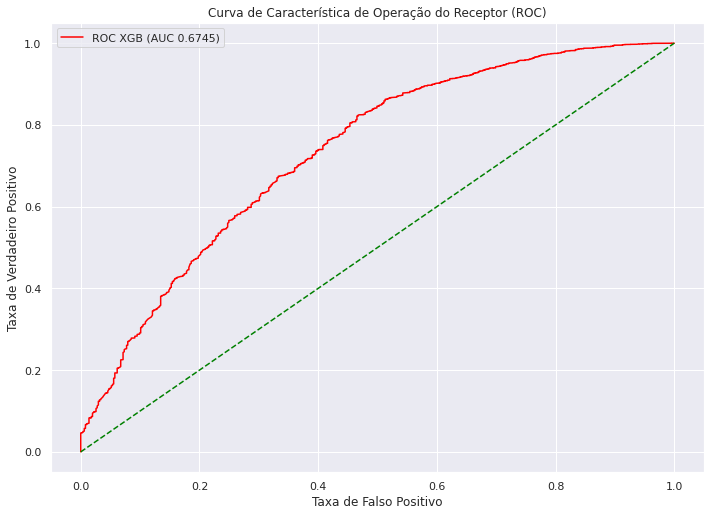

In [ ]:
fper_XGB, tper_XGB, _ = roc_curve(y_test, y_pred_xgb_model2_prob[:, 1])
auc_XGB = roc_auc_score(y_test, y_pred_xgb_model2)
plot_roc_curve([fper_XGB], [tper_XGB], [auc_XGB], ["XGB"])

In [ ]:
# Vamos usar Croos Validation para XGBoosting

teste4 = cross_val_score(xgb_model2, X, y, scoring='accuracy', cv=20)
teste4

array([0.92      , 0.91902439, 0.91804878, 0.91317073, 0.90926829,
       0.92097561, 0.92195122, 0.95317073, 0.91707317, 0.88780488,
       0.85853659, 0.92      , 0.90243902, 0.8702439 , 0.81054688,
       0.91699219, 0.74121094, 0.85742188, 0.91992188, 0.9140625 ])

In [ ]:
teste4.mean()

0.8945931783536587

#### Bagging

Acurácia:  0.8616035127663034
AUC: 0.6082

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.2355    0.3050    0.2657       505
           1     0.9361    0.9114    0.9236      5644

    accuracy                         0.8616      6149
   macro avg     0.5858    0.6082    0.5947      6149
weighted avg     0.8786    0.8616    0.8696      6149



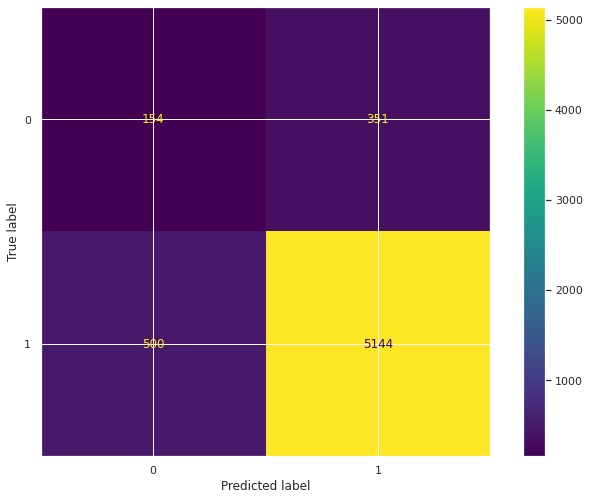

In [ ]:
# Random Forest

RF_model2 = RandomForestClassifier()
RF_model2.fit(X_ROS, y_ROS)
y_pred_RF_model2 = RF_model2.predict(X_test)
y_pred_RF_model2_prob = RF_model2.predict_proba(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_RF_model2))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_RF_model2)))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_RF_model2, digits=4))

# plotar a matrix de confusão
plot_confusion_matrix(RF_model2, X_test, y_test)

Matriz de confusão Random Forest

Para a classe 0 (Primeira linha da matriz de confusão):
- O modelo acertou 154 de 505, correspondente a 30.50% dos casos.


Para a classe 1 (Segunda linha da matriz de confusão):
- O modelo acertou 5151 de 5644, correspondente a 91.27% dos casos.


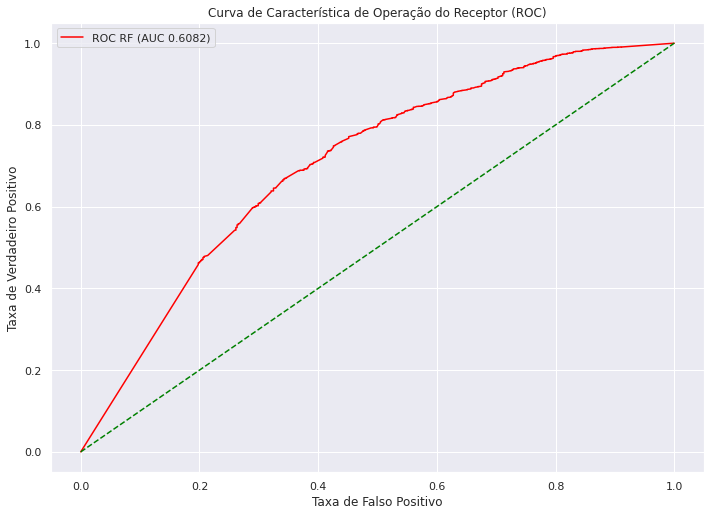

In [ ]:
fper_RF, tper_RF, _ = roc_curve(y_test, y_pred_RF_model2_prob[:, 1])
auc_RF = roc_auc_score(y_test, y_pred_RF_model2)
plot_roc_curve([fper_RF], [tper_RF], [auc_RF], ["RF"])

In [ ]:
# Vamos usar Croos Validation para Random Forest

teste5 = cross_val_score(RF_model2, X, y, scoring='accuracy', cv=20)
teste5

array([0.81658537, 0.90634146, 0.90536585, 0.82439024, 0.8       ,
       0.82243902, 0.83317073, 0.88097561, 0.81365854, 0.77365854,
       0.71707317, 0.88390244, 0.80390244, 0.75804878, 0.70996094,
       0.87792969, 0.66210938, 0.82714844, 0.875     , 0.89355469])

In [ ]:
teste5.mean()

0.8192607660060975

Acurácia:  0.7981785656204261
AUC: 0.6331

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.1871    0.4356    0.2617       505
           1     0.9427    0.8306    0.8831      5644

    accuracy                         0.7982      6149
   macro avg     0.5649    0.6331    0.5724      6149
weighted avg     0.8806    0.7982    0.8321      6149



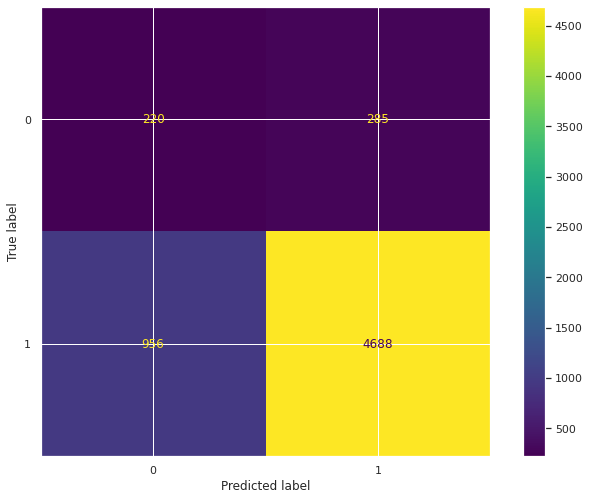

In [ ]:
# Bagging com Regressão Logística

bc = BaggingClassifier(base_estimator = LR_model2, n_estimators=99, n_jobs=-1)
bc.fit(X_ROS, y_ROS)
y_pred_bc = bc.predict(X_test)
y_pred_bc_prob = bc.predict_proba(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_bc))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_bc)))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_bc, digits=4))

# plotar a matrix de confusão
plot_confusion_matrix(bc, X_test, y_test)

Matriz de confusão Regressão Logística

Para a classe 0 (Primeira linha da matriz de confusão):
- O modelo acertou 220 de 505, correspondente a 43.56% dos casos.


Para a classe 1 (Segunda linha da matriz de confusão):
- O modelo acertou 4689 de 5644, correspondente a 83.08% dos casos.


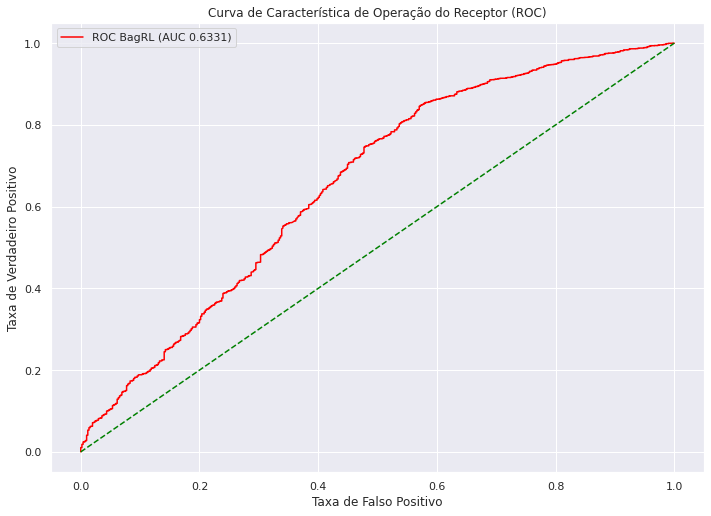

In [ ]:
fper_BagRL, tper_BagRL, _ = roc_curve(y_test, y_pred_bc_prob[:, 1])
auc_BagRL = roc_auc_score(y_test, y_pred_bc)
plot_roc_curve([fper_BagRL], [tper_BagRL], [auc_BagRL], ["BagRL"])

In [ ]:
# Vamos usar Croos Validation para Bagging com Regressão Logística

teste6 = cross_val_score(bc, X, y, scoring='accuracy', cv=20)
teste6

array([0.91902439, 0.92      , 0.92      , 0.92195122, 0.91707317,
       0.91902439, 0.92      , 0.92      , 0.92      , 0.91902439,
       0.91707317, 0.92      , 0.91902439, 0.91902439, 0.91992188,
       0.91894531, 0.91992188, 0.92285156, 0.91992188, 0.91992188])

In [ ]:
teste6.mean()

0.919635194359756

#### Resultados da curva ROC

In [ ]:
def plot_roc_curve(fpers, tpers, aucs, n):
  colors = ["red", "blue", "pink", "orange", "black", "yellow"]
  for i in range(len(aucs)):
    fper = fpers[i]
    tper = tpers[i]
    auc = aucs[i]
    label_ = 'ROC {} (AUC {:.4f})'.format(n[i],auc)
    plt.plot(fper, tper, color=colors[i], label=label_)
  plt.plot([0, 1], [0, 1], color='green', linestyle='--')
  plt.xlabel('Taxa de Falso Positivo')
  plt.ylabel('Taxa de Verdadeiro Positivo')
  plt.title('Curva de Característica de Operação do Receptor (ROC)')
  plt.legend()
  plt.show()

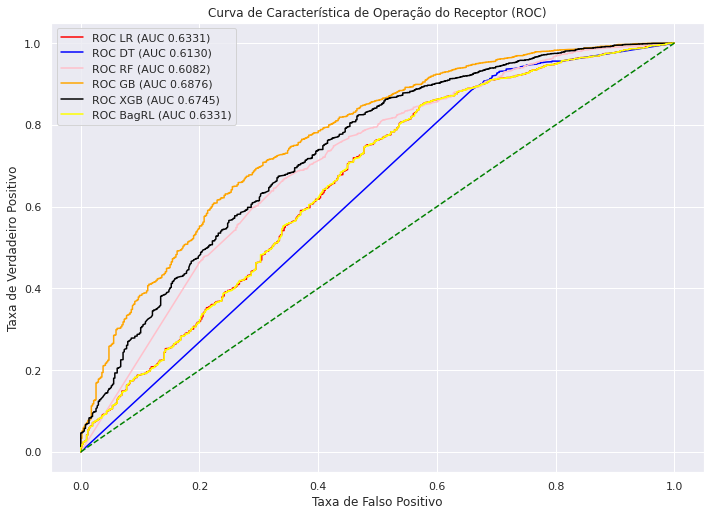

In [ ]:
plot_roc_curve([fper_LR,fper_DT,fper_RF,fper_GB,fper_XGB,fper_BagRL],[tper_LR,tper_DT,tper_RF,tper_GB,tper_XGB,tper_BagRL],[auc_LR,auc_DT,auc_RF,auc_GB,auc_XGB,auc_BagRL],["LR","DT","RF","GB","XGB","BagRL"])

### K-means

In [ ]:
# dados de treino balanceados (70% do total)
df_todo_balanc = pd.DataFrame(X_ROS, columns = ["precipitacao_media_nos_ultimos_sete_anos", "total_ganho_pela_familia_mes_passado", "disponibilidade_alimento_pos_covid",
                                                "estado_civil", "n_filhos", "cor_ou_raca_encoded"])

df_todo_balanc['classificacao'] = y_ROS

# dados de treino balanceados (70% do total)
df_todo_balanc.head(3)

,precipitacao_media_nos_ultimos_sete_anos,total_ganho_pela_familia_mes_passado,disponibilidade_alimento_pos_covid,estado_civil,n_filhos,cor_ou_raca_encoded,classificacao
0,0.327441,0.225,1.0,0,2.0,3,1
1,0.692966,0.175,1.0,0,1.0,4,1
2,0.562197,0.200,1.0,1,1.0,3,1


In [ ]:
kmeans = KMeans(n_clusters = 2, random_state = 42)

In [ ]:
kmeans.fit(X_ROS)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df_todo_balanc['k-classes']= kmeans.labels_

In [ ]:
df_todo_balanc.head()

,precipitacao_media_nos_ultimos_sete_anos,total_ganho_pela_familia_mes_passado,disponibilidade_alimento_pos_covid,estado_civil,n_filhos,cor_ou_raca_encoded,classificacao,k-classes
0,0.327441,0.2250,1.0,0,2.0,3,1,1
1,0.692966,0.1750,1.0,0,1.0,4,1,1
2,0.562197,0.2000,1.0,1,1.0,3,1,1
3,0.548954,0.1355,0.0,0,2.0,3,1,1
4,0.548954,0.2500,0.0,0,1.0,1,1,0


In [ ]:
df_todo_balanc['classificacao'].value_counts()

1    13204
0    13204
Name: classificacao, dtype: int64

In [ ]:
df_todo_balanc['k-classes'].value_counts()

1    22179
0     4229
Name: k-classes, dtype: int64

In [ ]:
# Devido ao desempenho do modelo não seguimos nas analises

### DBSCAN

In [ ]:
# data_unsupervised recebe data_importance sem a coluna 'classificacao'

data_unsupervised = data_importance[["precipitacao_media_nos_ultimos_sete_anos", "total_ganho_pela_familia_mes_passado", "disponibilidade_alimento_pos_covid",
                              "estado_civil", "n_filhos", "cor_ou_raca_encoded"]]

In [ ]:
# Verificar se esses dados estão norlizados
data_unsupervised.head(3)

,precipitacao_media_nos_ultimos_sete_anos,total_ganho_pela_familia_mes_passado,disponibilidade_alimento_pos_covid,estado_civil,n_filhos,cor_ou_raca_encoded
0,0.462801,0.150,1.0,0,1.0,1
1,0.462801,0.175,1.0,0,2.0,3
2,0.462801,0.200,1.0,0,1.0,3


In [ ]:
# Se pela célula acima foi notado que não está normalizado, execute essa célula para normalizar
# e mude o nome da variável data_unsupervised nas células seguintes para data_unsupervised_norm

# data_unsupervised_stand = StandardScaler().fit_transform(data_unsupervised)

In [ ]:
# Representação dos dados sem suas labels

# plt.figure(figsize=(12, 5))

# plt.scatter(data_unsupervised['total_ganho_pela_familia_mes_passado'], data_unsupervised['n_filhos'])
# plt.show()

In [ ]:
clustering = DBSCAN(eps=1, min_samples=300).fit(data_unsupervised) # Testar alguns valores para eps e min_samples
labels = clustering.labels_
labels

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
data_unsupervised['labels']= labels

In [ ]:
data_unsupervised['classificacao'] = y_ROS

In [ ]:
data_unsupervised['classificacao'].value_counts()

1.0    10147
0.0     9910
Name: classificacao, dtype: int64

In [ ]:
data_unsupervised['labels'].value_counts()

 1    16823
 0     2044
-1     1627
Name: labels, dtype: int64

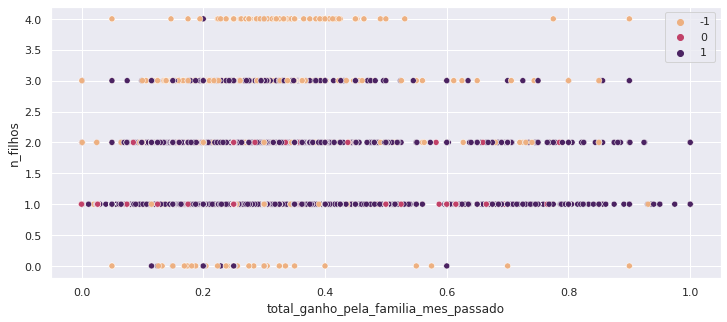

In [ ]:
# Resultado com labels encontradas pelo DBSCAN

plt.figure(figsize=(12, 5))

sns.scatterplot(x=data_unsupervised['total_ganho_pela_familia_mes_passado'],
                y=data_unsupervised['n_filhos'],
                hue=labels,
                palette='flare');

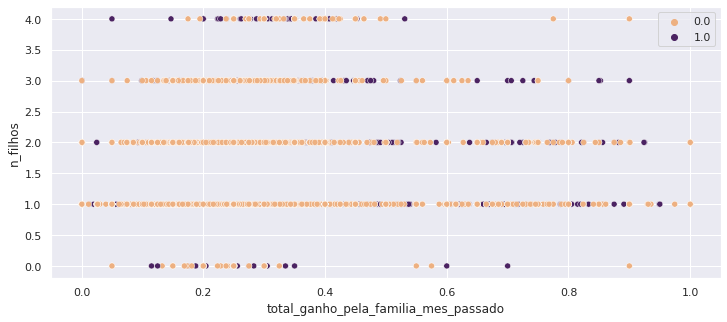

In [ ]:
# Resultado com labels verdadeiras

plt.figure(figsize=(12, 5))

sns.scatterplot(x=data_unsupervised['total_ganho_pela_familia_mes_passado'],
                y=data_unsupervised['n_filhos'],
                hue=data_unsupervised['classificacao'].values,
                palette='flare');

# Checkpoint 4

## Escolha e melhoria do modelo final: escolhemos o Random Forest

In [ ]:
# Random Forest

RF_model2 = RandomForestClassifier()
RF_model2.fit(X_ROS, y_ROS)
y_pred_RF_model2 = RF_model2.predict(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_RF_model2))

testeRF = cross_val_score(RF_model2, X, y, scoring='accuracy', cv=20)
print("Média da acurácia: ", testeRF.mean())

Acurácia:  0.8632297934623516
Média da acurácia:  0.819016053734756


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 3)]
max_depth = [int(x) for x in np.linspace(5, 110, num = 3)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [50, 525, 1000], 'max_depth': [5, 57, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = RF_model2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_ROS, y_ROS)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 57, 110],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 525, 1000]},
                   random_state=42, verbose=2)

In [ ]:
y_pred_rf_random = rf_random.predict(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_rf_random))

Acurácia:  0.8682712636201009


In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 57,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 525}

In [ ]:
rf_best_params = RandomForestClassifier(bootstrap=False, max_depth = 110, n_jobs = -1, n_estimators = 525, max_features = 4, min_samples_leaf= 1, min_samples_split= 2)
rf_best_params.fit(X_ROS, y_ROS)

y_pred_rf_best_params = rf_best_params.predict(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_rf_best_params))

Acurácia:  0.8664823548544479


In [ ]:
param_distributions={'bootstrap': [True],
                    'max_depth': [5, 57, 110],
                    'min_samples_leaf': [1, 2, 4],
                    'min_samples_split': [2, 5, 10],
                    'n_estimators': [50, 525, 1000],
                    }

In [ ]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_distributions, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_ROS, y_ROS)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 57, 110],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 525, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 525}

In [ ]:
# Random Forest Final

RF_model_final = RandomForestClassifier(
    bootstrap=True, max_depth = 57,
    n_jobs = -1, n_estimators = 1000,
    max_features = 4, min_samples_leaf = 1,
    min_samples_split = 2)
RF_model_final.fit(X_ROS, y_ROS)

y_pred_RF_model_final = RF_model_final.predict(X_test)

print('Acurácia: ', accuracy_score(y_test, y_pred_RF_model_final))

Acurácia:  0.8635550496015613
